# Homework #5. Exploratory Data Analysis
#### Author: `Kuziomko Yaryna`
#### Total time spent on h/w (in minutes): `1560`

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import wordcloud 
import emoji
from PIL import Image
from wordcloud import WordCloud
from stop_words import get_stop_words
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
DIALOGS_MERGED_DATA_PATH = "data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "data/merged_data/dialogs_users_all.csv"

In [3]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

In [4]:
df['date'] = pd.to_datetime(df['date']).dt.date
df['from_id'] = df['from_id'].apply(lambda x: np.int64(x.strip().split('=')[-1].replace(")", "")) if type(x) != float else x)

In [5]:
my_id = 459802765

In [59]:
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')

# Messages data analysis

1. To draw graphs showing the relationship between the date and the number of text messages of a certain type that I sent:

    1.1 Separate dependency graphs for each type
    
    1.2 Comparative graph of all types and number of sent SMS
    
    1.3 %-вependence between the number of text messages of each type on the pie chart

1.1 Separate dependency graphs for each type

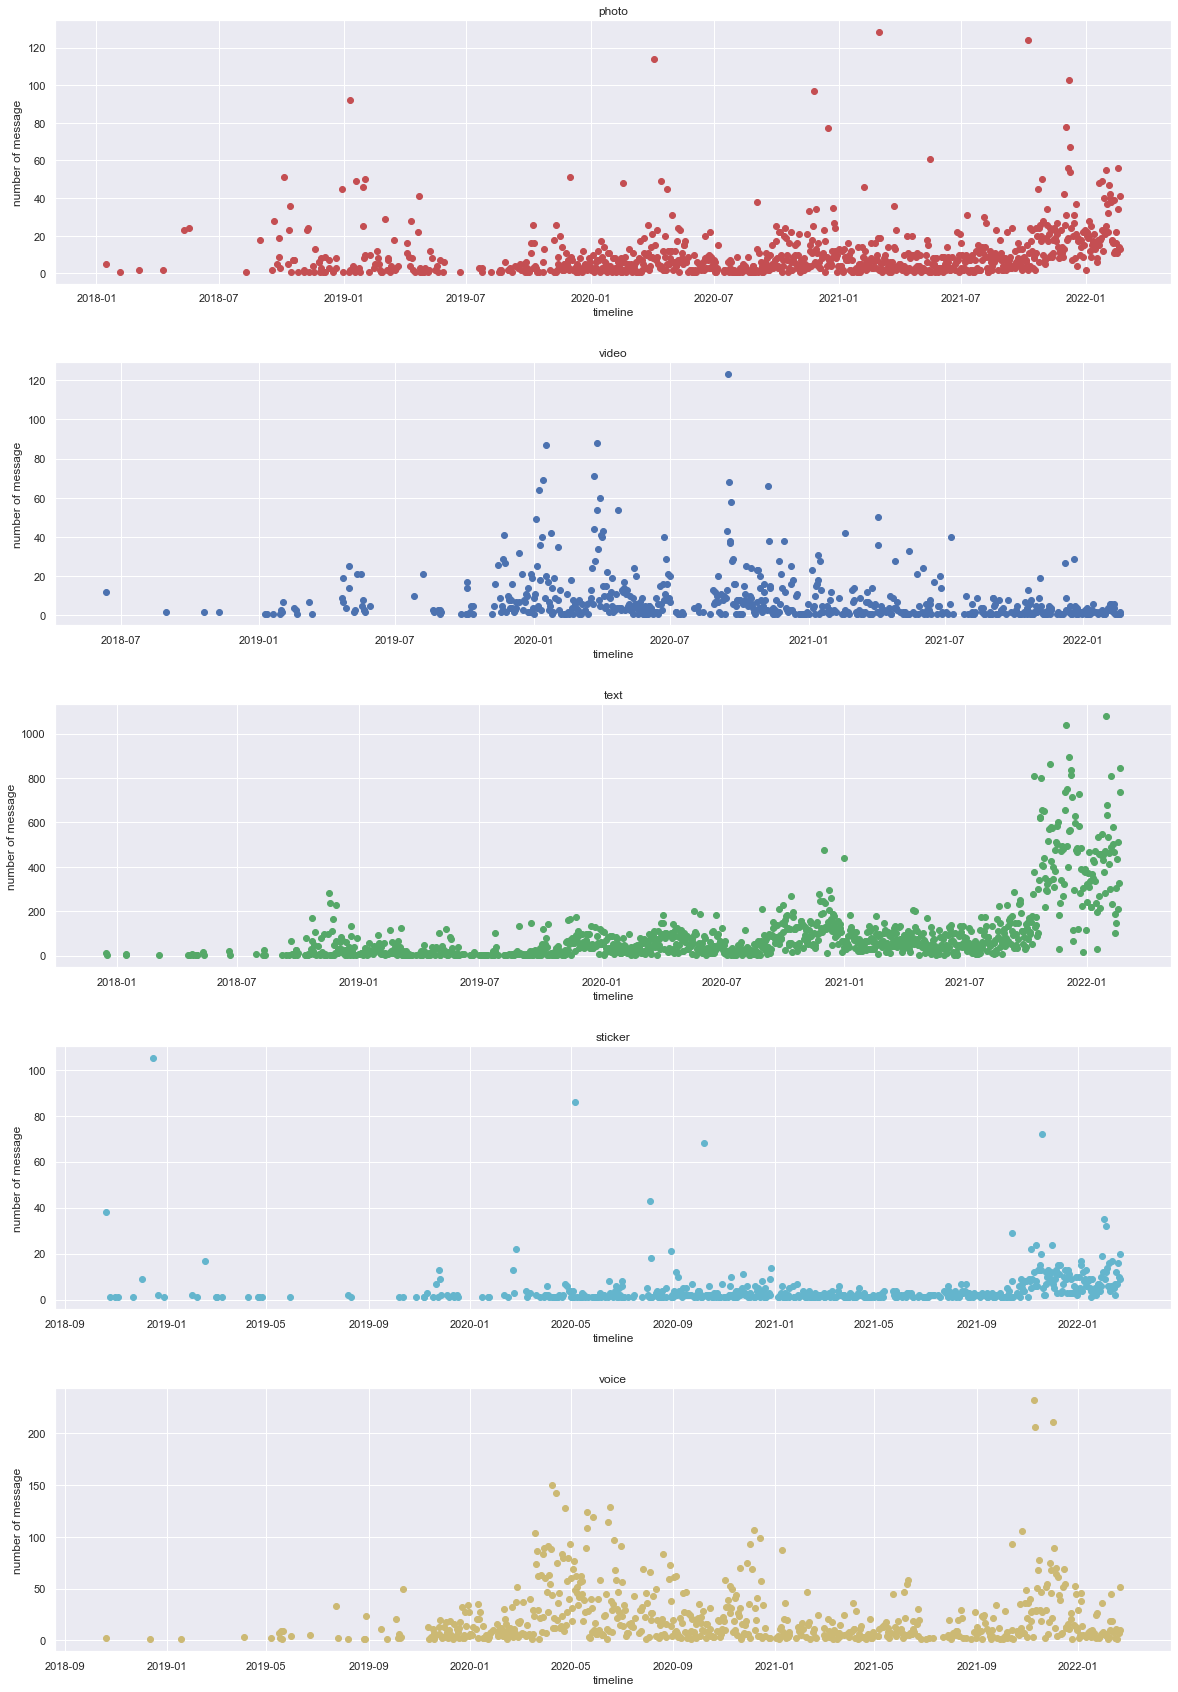

In [210]:
fig, ax = plt.subplots()
fig.set_size_inches(20,30)
types = df['type'].unique()
colors = ['r', 'b', 'g', 'c', 'y']

for number, m_type in enumerate(types):
    plt.subplot(5,1,number + 1)
    temp_df = df[(df['type'] == m_type) & (df['from_id'] == my_id)]
    temp_df = temp_df.groupby('date', as_index=False)['type'].count()
    x=temp_df['date']
    y=temp_df['type']
    plt.scatter(x,y, color=colors[number])
    plt.title(m_type)
    plt.ylabel(u'number of message')
    plt.xlabel(u'timeline')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

sns.set(style="darkgrid")
plt.show()

1.2 Comparative graph of all types and number of sent SMS

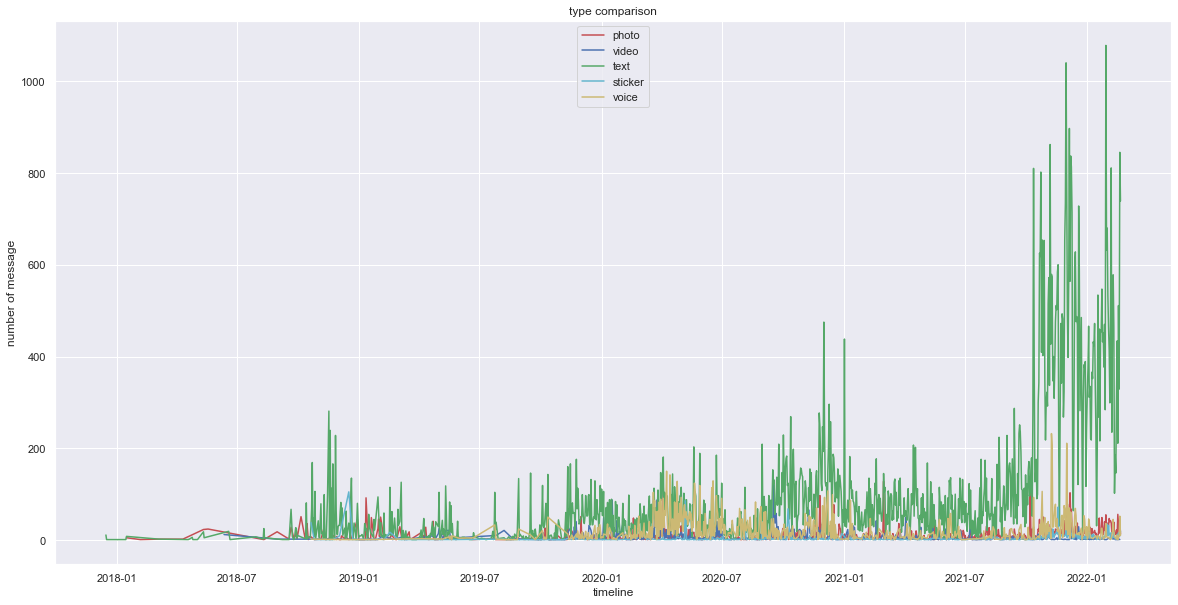

In [209]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
types = df['type'].unique()
colors = ['r', 'b', 'g', 'c', 'y']

temp_df = df[(df['type'] == types[0]) & (df['from_id'] == my_id)]
temp_df = temp_df.groupby('date', as_index=False)['type'].count()
x_1=temp_df['date']
y_1=temp_df['type']
plt.plot(x_1,y_1, color=colors[0], label=types[0])

temp_df = df[(df['type'] == types[1]) & (df['from_id'] == my_id)]
temp_df = temp_df.groupby('date', as_index=False)['type'].count()
x_2=temp_df['date']
y_2=temp_df['type']
plt.plot(x_2,y_2, color=colors[1], label=types[1])

temp_df = df[(df['type'] == types[2]) & (df['from_id'] == my_id)]
temp_df = temp_df.groupby('date', as_index=False)['type'].count()
x_3=temp_df['date']
y_3=temp_df['type']
plt.plot(x_3,y_3, color=colors[2], label=types[2])

temp_df = df[(df['type'] == types[3]) & (df['from_id'] == my_id)]
temp_df = temp_df.groupby('date', as_index=False)['type'].count()
x_4=temp_df['date']
y_4=temp_df['type']
plt.plot(x_4,y_4, color=colors[3], label=types[3])

temp_df = df[(df['type'] == types[4]) & (df['from_id'] == my_id)]
temp_df = temp_df.groupby('date', as_index=False)['type'].count()
x_5=temp_df['date']
y_5=temp_df['type']
plt.plot(x_5,y_5, color=colors[4], label=types[4])

plt.title('type comparison')
plt.ylabel(u'number of message')
plt.xlabel(u'timeline')
plt.legend(loc = 'upper center')


sns.set(style="darkgrid")

plt.show()
    

1.3 %-вependence between the number of text messages of each type on the pie chart

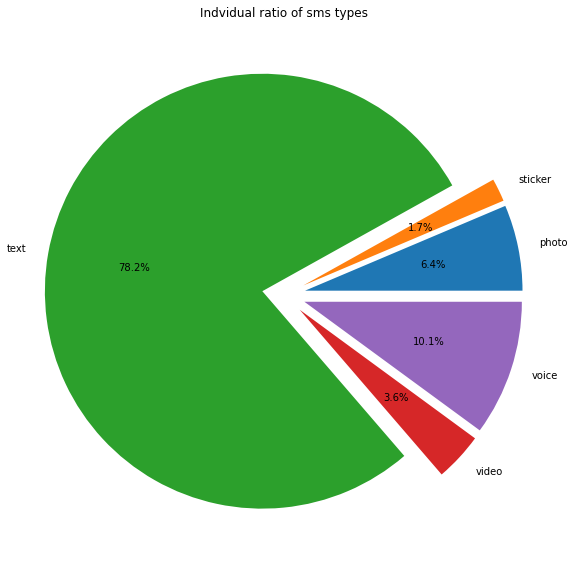

In [9]:
send_message = df[(df['from_id'] == my_id)] 

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
values = send_message.groupby('type')['type'].count()
labels = list(send_message.groupby('type')['type'].count().index)
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
ax.pie(values, labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('Indvidual ratio of sms types')


plt.show()

1.3* %-вependence between the number of text messages in private dialogs of each type on the pie chart

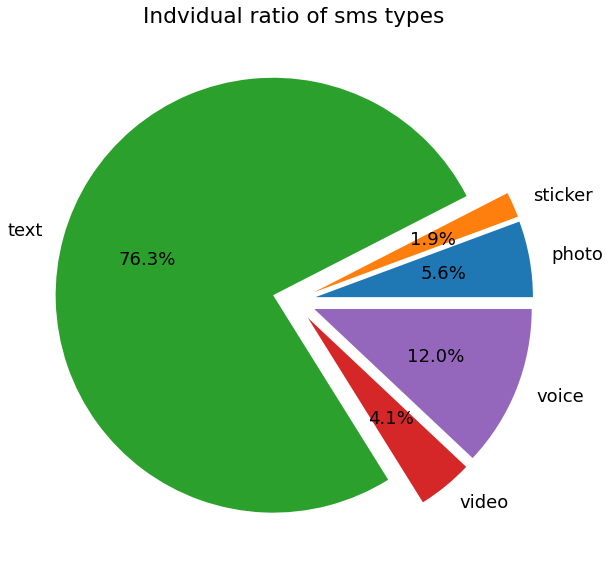

In [17]:
send_message = df_merged[(df_merged['from_id'] == my_id) & (df_merged['type_dialog'].str.contains("Private dialog") == True)] 

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
values = send_message.groupby('type_message')['type_message'].count()
labels = list(send_message.groupby('type_message')['type_message'].count().index)
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
ax.pie(values, labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('Indvidual ratio of sms types')
plt.rcParams['font.size'] = '20'

plt.show()

2. To draw graphs showing the relationship between the date and the number of text messages of a certain type that I received:

    2.1 Separate dependency graphs for each type
    
    2.2 Comparative graph of all types and number of received SMS
    
    2.3 %-вependence between the number of text messages of each type on the pie chart

2.1 Separate dependency graphs for each type

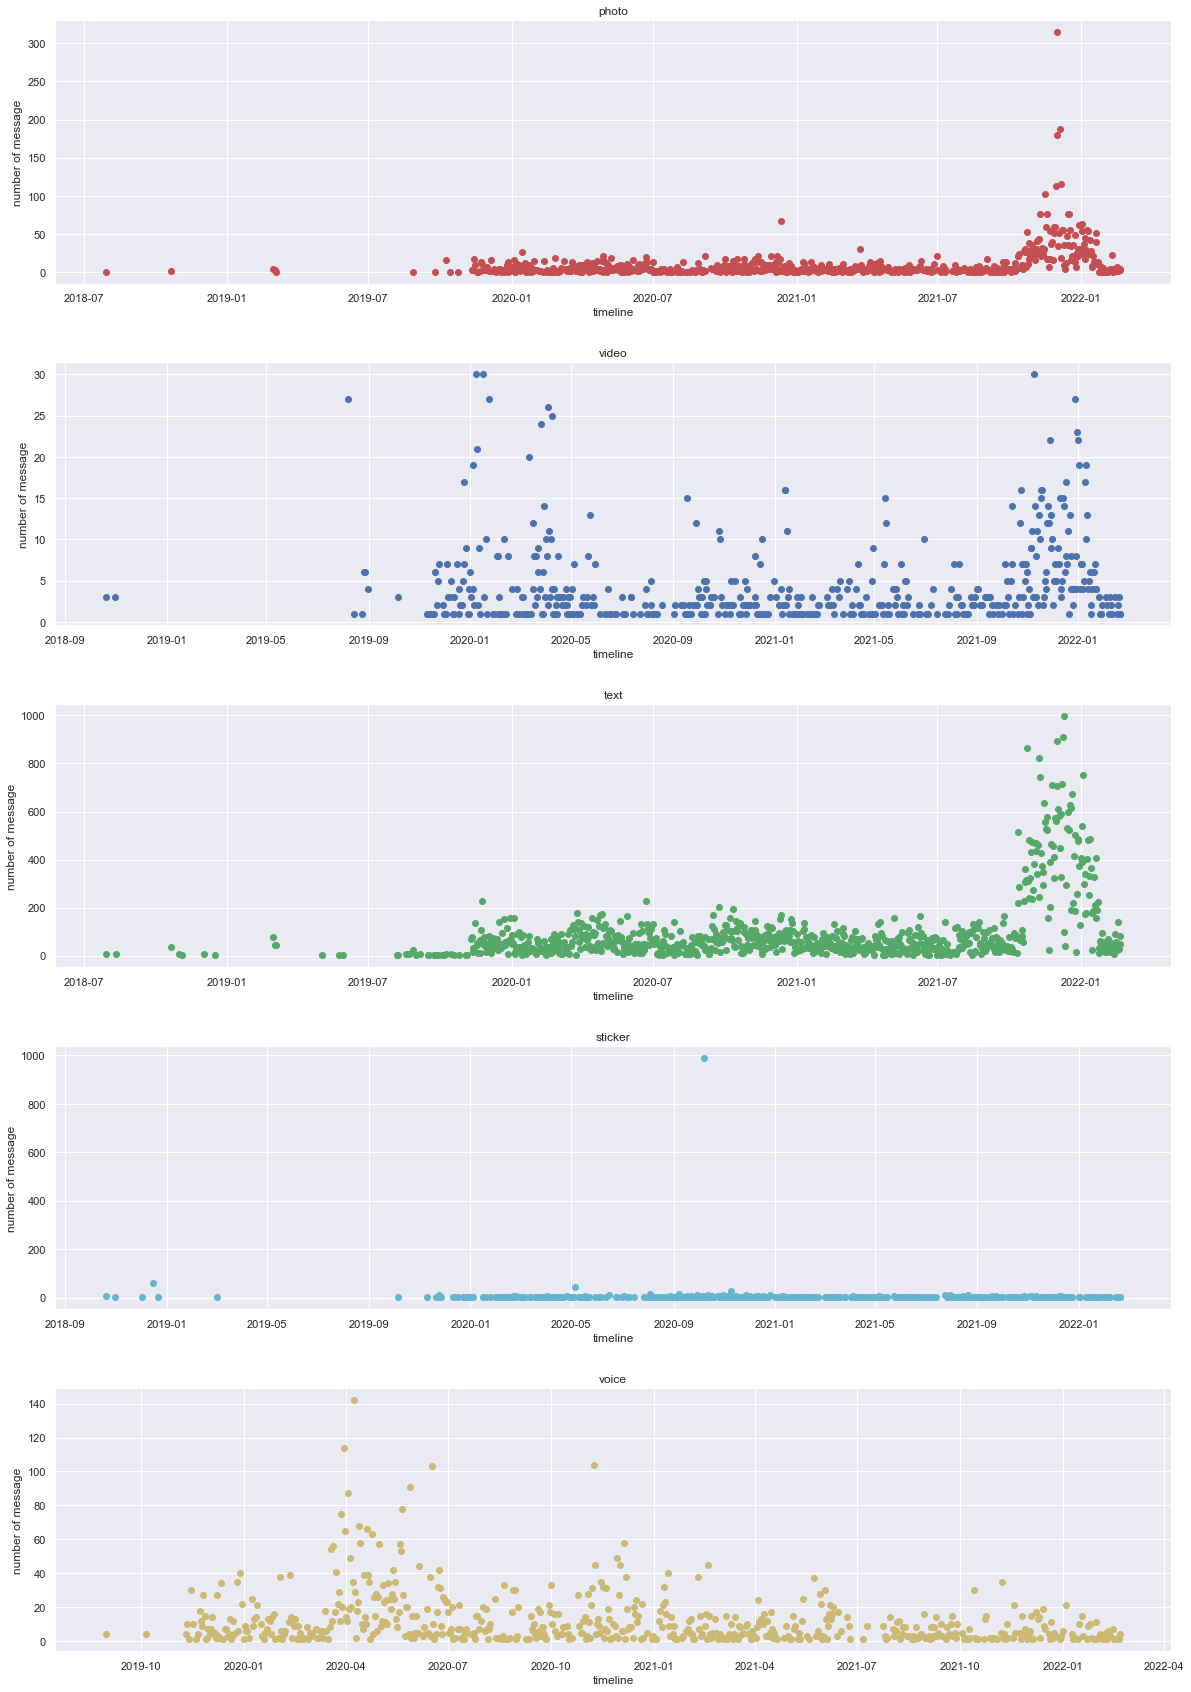

In [208]:
fig, ax = plt.subplots()
fig.set_size_inches(20,30)
types = df['type'].unique()
colors = ['r', 'b', 'g', 'c', 'y']

for number, m_type in enumerate(types):
    plt.subplot(5,1,number + 1)
    temp_df = df[(df['type'] == m_type) & (df['to_id'] == my_id)]
    temp_df = temp_df.groupby('date', as_index=False)['type'].count()
    x=temp_df['date']
    y=temp_df['type']
    plt.scatter(x, y, color=colors[number])
    plt.title(m_type)
    plt.ylabel(u'number of message')
    plt.xlabel(u'timeline')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

sns.set(style="darkgrid")
plt.show()

2.2 Comparative graph of all types and number of received SMS

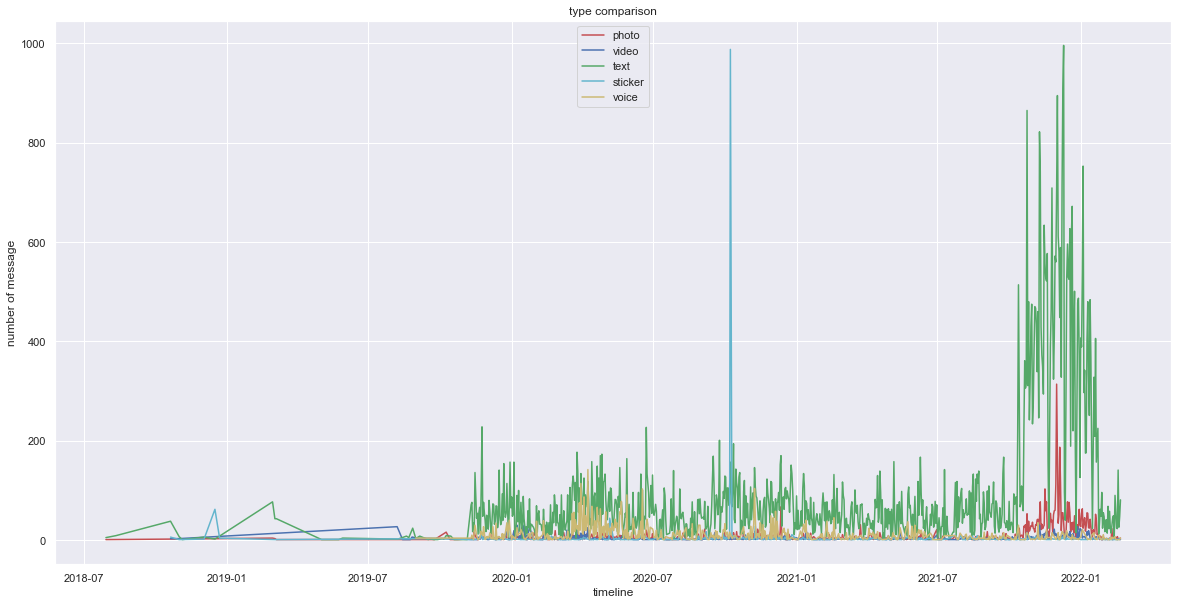

In [207]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
types = df['type'].unique()
colors = ['r', 'b', 'g', 'c', 'y']

temp_df = df[(df['type'] == types[0]) & (df['to_id'] == my_id)]
temp_df = temp_df.groupby('date', as_index=False)['type'].count()
x_1=temp_df['date']
y_1=temp_df['type']
plt.plot(x_1,y_1, color=colors[0], label=types[0])

temp_df = df[(df['type'] == types[1]) & (df['to_id'] == my_id)]
temp_df = temp_df.groupby('date', as_index=False)['type'].count()
x_2=temp_df['date']
y_2=temp_df['type']
plt.plot(x_2,y_2, color=colors[1], label=types[1])

temp_df = df[(df['type'] == types[2]) & (df['to_id'] == my_id)]
temp_df = temp_df.groupby('date', as_index=False)['type'].count()
x_3=temp_df['date']
y_3=temp_df['type']
plt.plot(x_3,y_3, color=colors[2], label=types[2])

temp_df = df[(df['type'] == types[3]) & (df['to_id'] == my_id)]
temp_df = temp_df.groupby('date', as_index=False)['type'].count()
x_4=temp_df['date']
y_4=temp_df['type']
plt.plot(x_4,y_4, color=colors[3], label=types[3])

temp_df = df[(df['type'] == types[4]) & (df['to_id'] == my_id)]
temp_df = temp_df.groupby('date', as_index=False)['type'].count()
x_5=temp_df['date']
y_5=temp_df['type']
plt.plot(x_5,y_5, color=colors[4], label=types[4])

plt.title('type comparison')
plt.ylabel(u'number of message')
plt.xlabel(u'timeline')
plt.legend(loc = 'upper center')


sns.set(style="darkgrid")

plt.show()
    

2.3 %-dependence between the number of text messages of each type on the pie chart

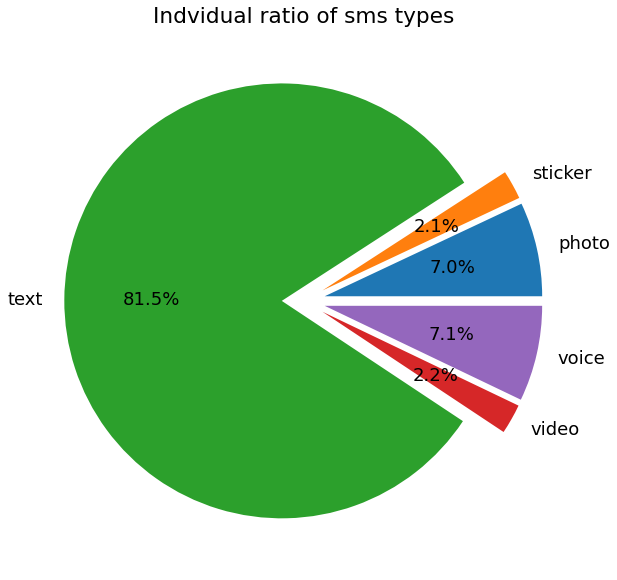

In [550]:
send_message = df[(df['to_id'] == my_id)] 

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
values = send_message.groupby('type')['type'].count()
labels = list(send_message.groupby('type')['type'].count().index)
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
ax.pie(values, labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('Indvidual ratio of sms types')


plt.show()

2.3* %-dependence between the number of text messages in private dialogs of each type on the pie chart

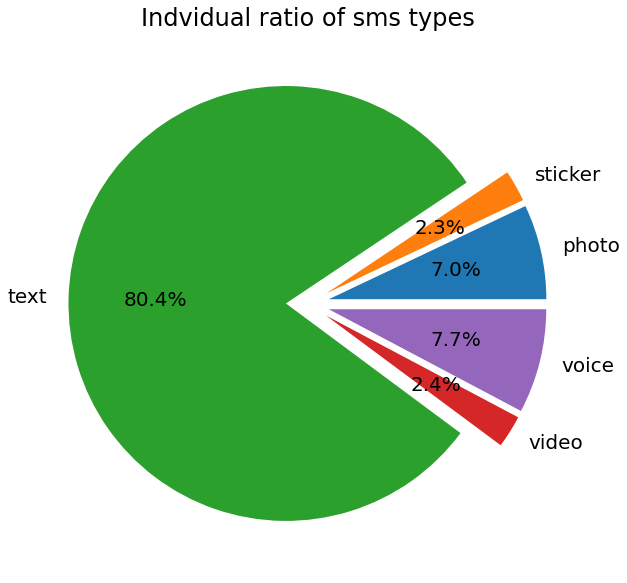

In [18]:
send_message = df_merged[(df_merged['to_id'] == my_id) & (df_merged['type_dialog'].str.contains("Private dialog") == True)] 

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
values = send_message.groupby('type_message')['type_message'].count()
labels = list(send_message.groupby('type_message')['type_message'].count().index)
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
ax.pie(values, labels=labels, autopct='%1.1f%%', explode=explode)
plt.title('Indvidual ratio of sms types')


plt.show()

3. Show the size(duration) of the sent video-messages on the diagram

    3.1 Display all message and their duraion

    3.2 Display the length of all sent videos in a certain size range

3.1 Display all message and their duraion

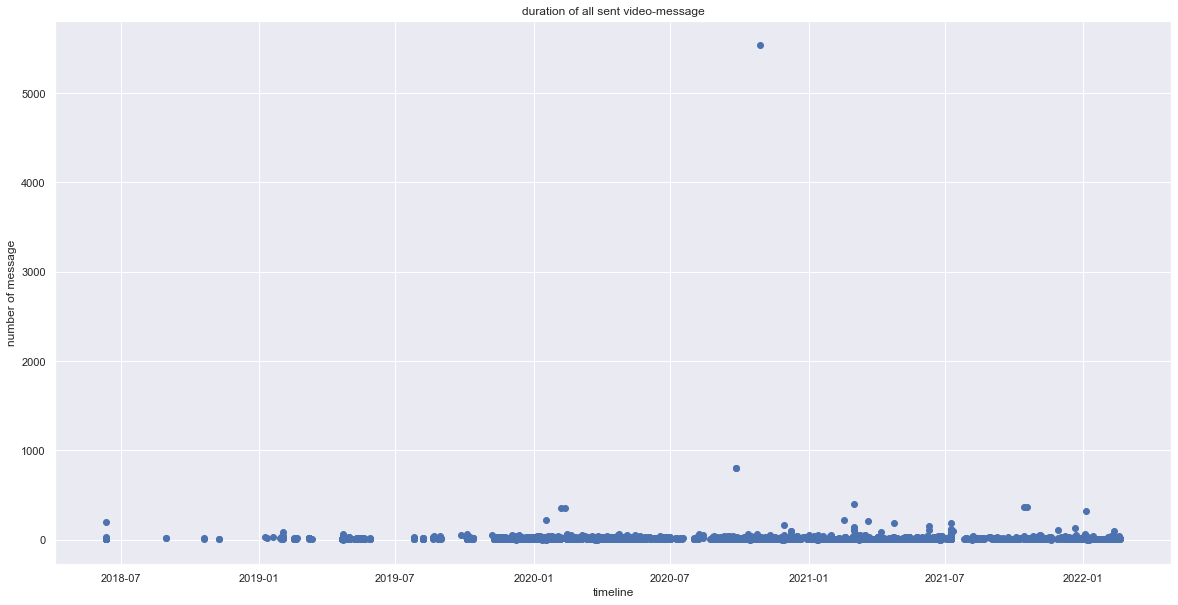

In [41]:
temp_df = df[(df['type'] == 'video') & (df['from_id'] == my_id)]
x = temp_df['date']
y = temp_df['duration']

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

plt.scatter(x,y)
plt.ylabel(u'number of message')
plt.xlabel(u'timeline')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.title('duration of all sent video-message')


plt.show()

3.2 Display the length of all sent videos in a certain size range

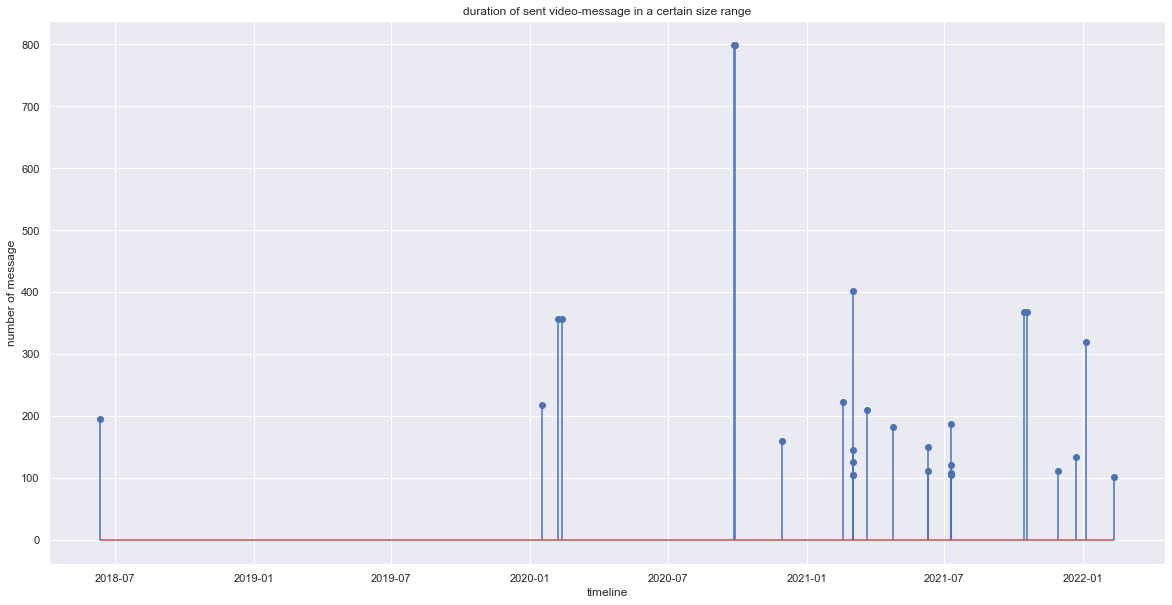

In [28]:
temp_df = temp_df[(temp_df['duration'] >= 100) & (temp_df['duration'] <= 2000) & (temp_df['from_id']==my_id)]
x = temp_df['date']
y = temp_df['duration']

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

plt.stem(x,y)
plt.ylabel(u'number of message')
plt.xlabel(u'timeline')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.title('duration of sent video-message in a certain size range')

plt.show()

4. Show the size(duration) of the received video-messages on the diagram

    4.1 Display all message and their duraion

    4.2 Display the length of all received videos in a certain size range

4.1 Display all message and their duraion

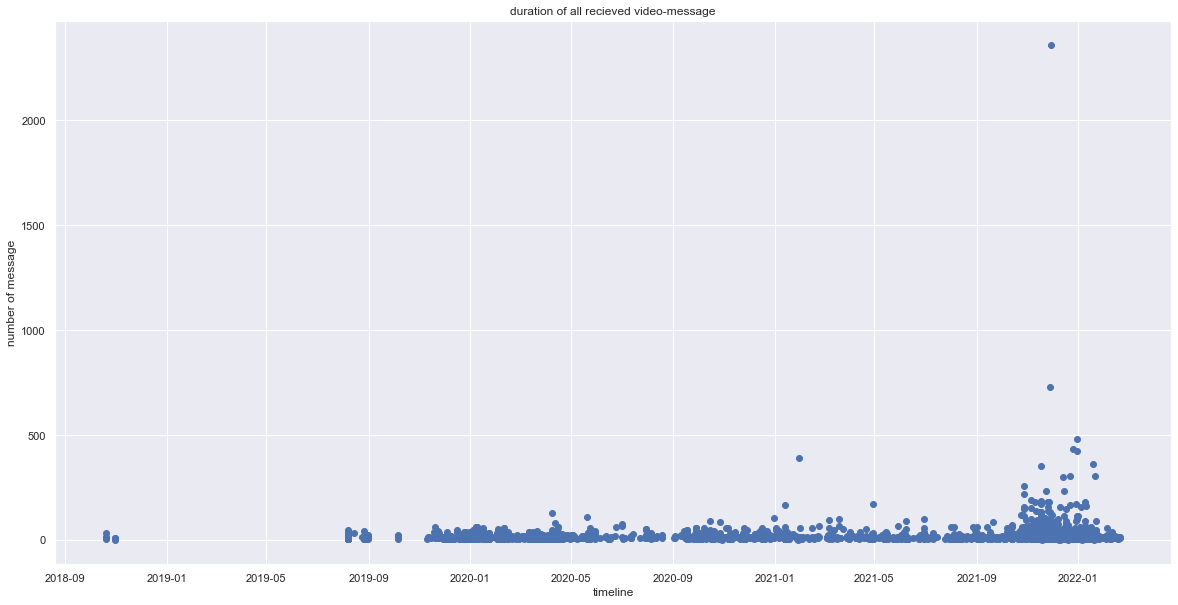

In [94]:
temp_df1 = df[(df['type'] == 'video') & (df['to_id'] == my_id)]
x1 = temp_df1['date']
y1 = temp_df1['duration']


fig, ax = plt.subplots()
fig.set_size_inches(20,10)

plt.scatter(x1,y1)
plt.ylabel(u'number of message')
plt.xlabel(u'timeline')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.title('duration of all recieved video-message')

plt.show()

4.2 Display the length of all received videos in a certain size range

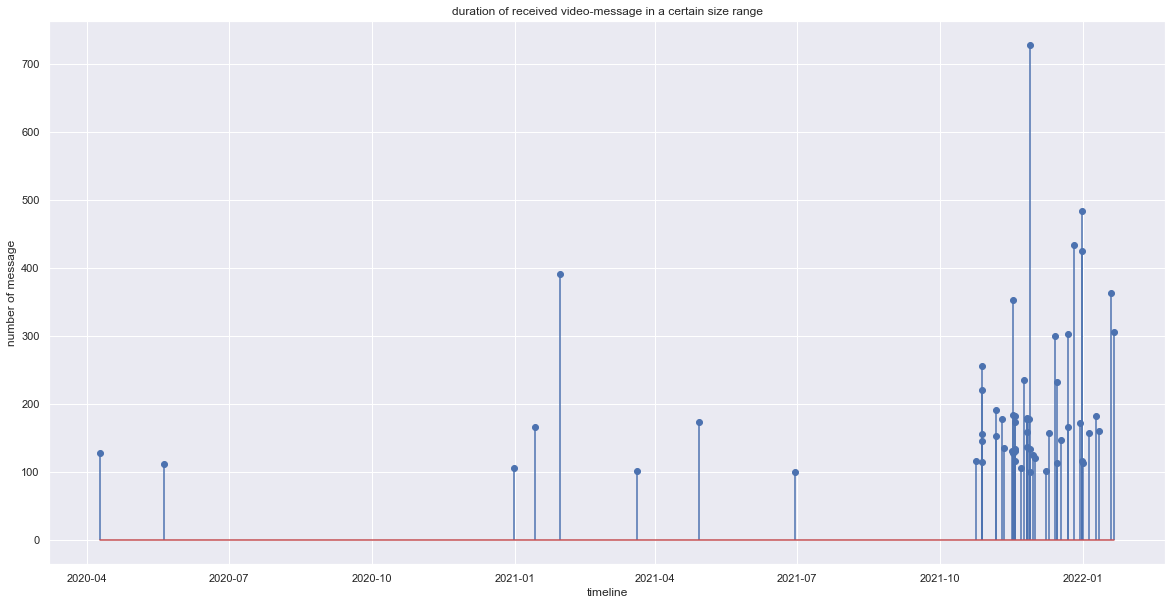

In [32]:
temp_df1 = temp_df1[(temp_df1['duration'] >= 100) & (temp_df1['duration'] <= 1000) & (temp_df1['to_id'] == my_id)]
x1 = temp_df1['date']
y1 = temp_df1['duration']

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

plt.stem(x1,y1)
plt.ylabel(u'number of message')
plt.xlabel(u'timeline')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.title('duration of received video-message in a certain size range')

plt.show()



5. Show the size(duration) of the sent voice-messages on the diagram

    5.1 Display all message and their duraion

    5.2 Display the length of all received videos in a certain size range

5.1 Display all message and their duraion

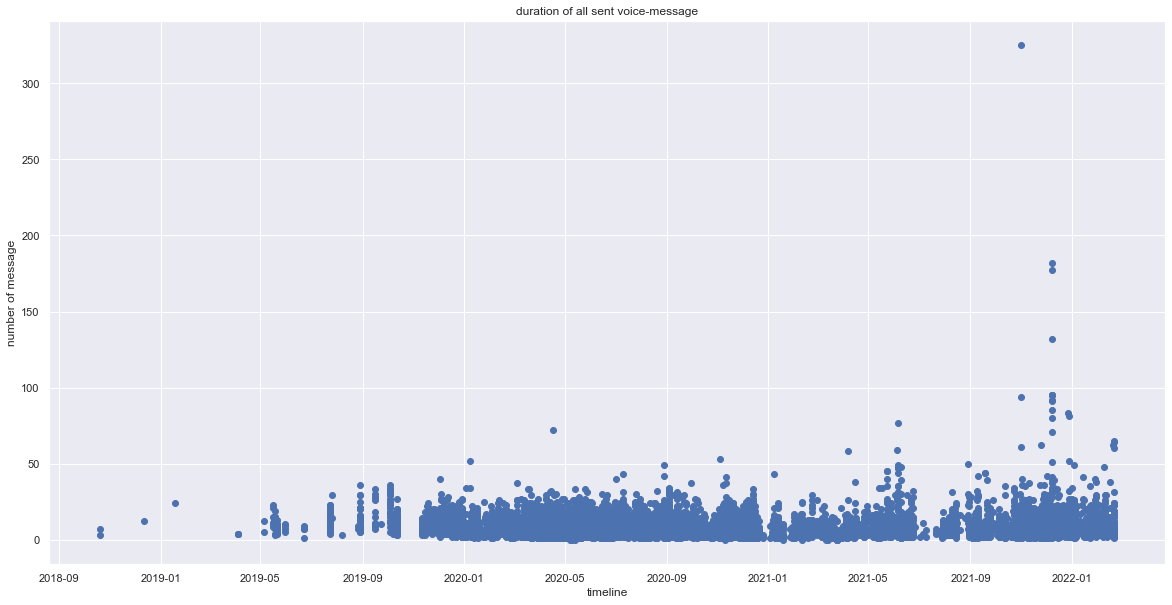

In [33]:
temp_df2 = df[(df['type'] == 'voice') & (df['from_id'] == my_id)]
x2 = temp_df2['date']
y2 = temp_df2['duration']


fig, ax = plt.subplots()
fig.set_size_inches(20,10)

plt.scatter(x2,y2)
plt.ylabel(u'number of message')
plt.xlabel(u'timeline')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.title('duration of all sent voice-message')

plt.show()

5.2 Display the length of all sent videos in a certain size range

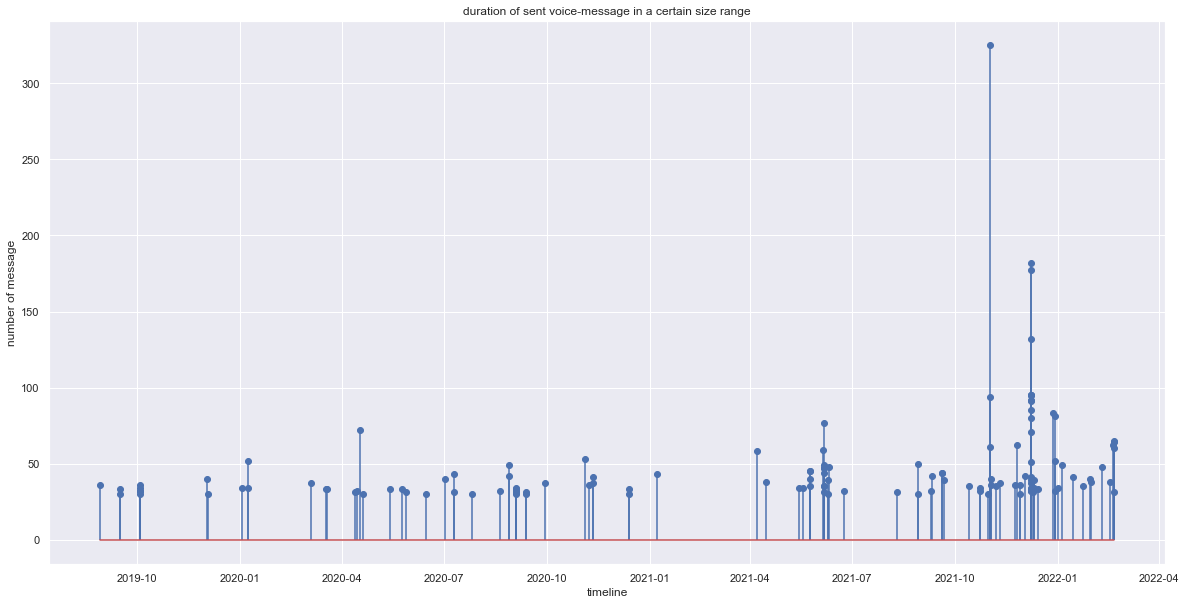

In [35]:
temp_df2 = temp_df2[(temp_df2['duration'] >= 30) & (temp_df2['duration'] <= 500) & (temp_df2['from_id']==my_id)]
x2 = temp_df2['date']
y2 = temp_df2['duration']

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

plt.stem(x2,y2)
plt.ylabel(u'number of message')
plt.xlabel(u'timeline')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.title('duration of sent voice-message in a certain size range')

plt.show()

6. Show the size(duration) of the received voice-messages on the diagram

    6.1 Display all message and their duraion

    6.2 Display the length of all received videos in a certain size range

6.1 Display all message and their duraion

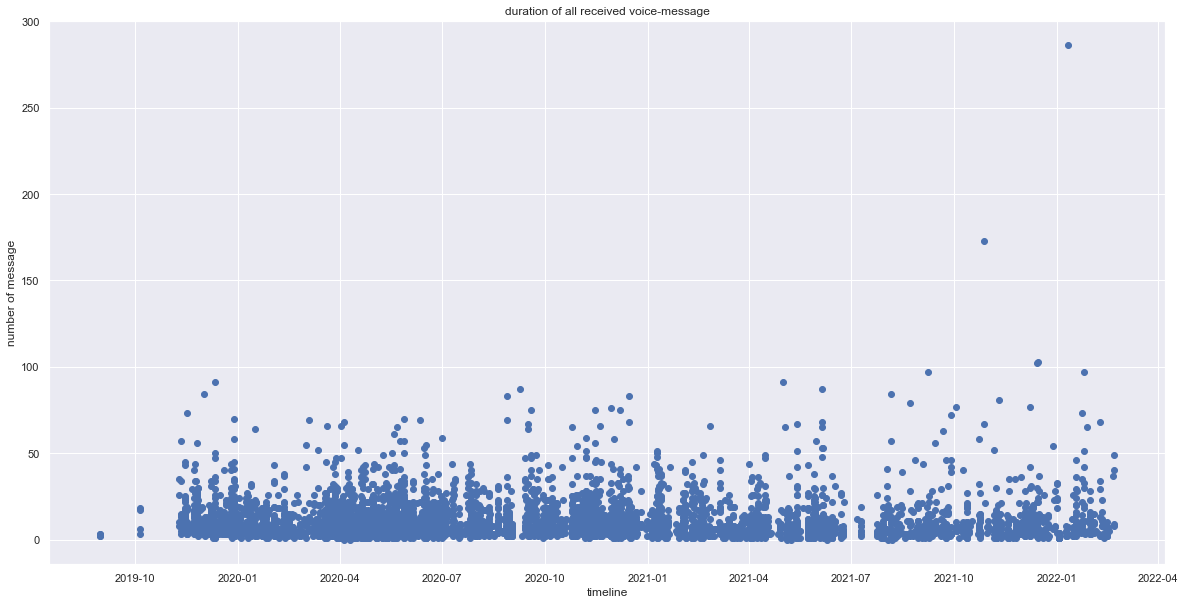

In [36]:
temp_df3 = df[(df['type'] == 'voice') & (df['to_id'] == my_id)]
x3 = temp_df3['date']
y3 = temp_df3['duration']


fig, ax = plt.subplots()
fig.set_size_inches(20,10)

plt.scatter(x3,y3)
plt.ylabel(u'number of message')
plt.xlabel(u'timeline')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.title('duration of all received voice-message')

plt.show()

6.2 Display the length of all received videos in a certain size range

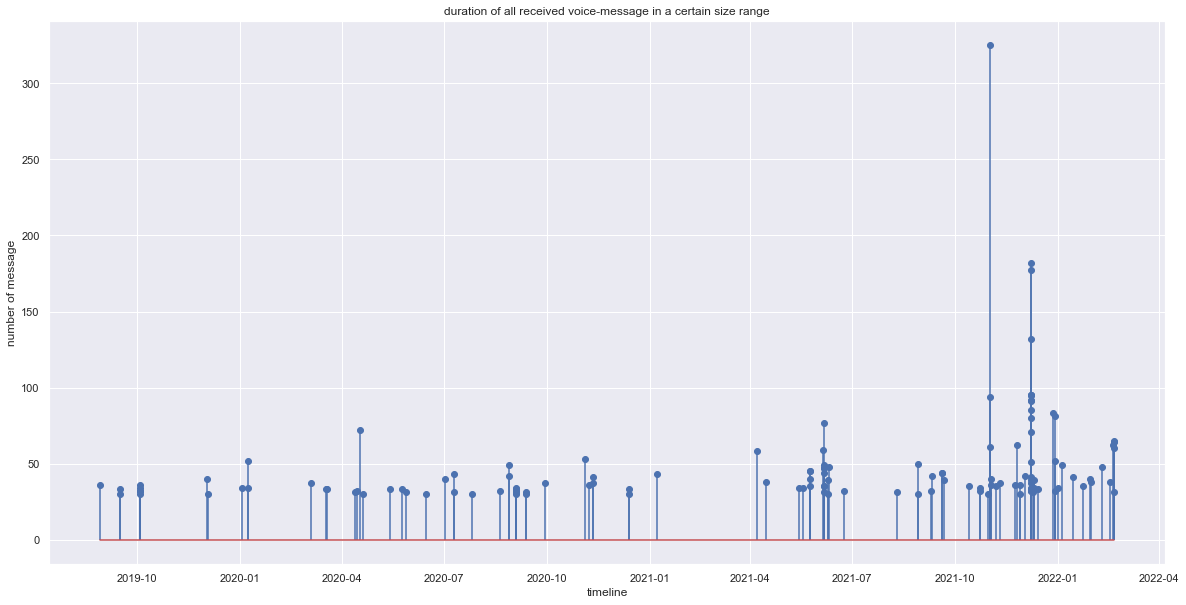

In [37]:
temp_df3 = temp_df3[(temp_df3['duration'] >= 50) & (temp_df3['duration'] <= 500) & (temp_df3['to_id'] == my_id)]
x3 = temp_df3['date']
y3 = temp_df3['duration']

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

plt.stem(x2,y2)
plt.ylabel(u'number of message')
plt.xlabel(u'timeline')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.title('duration of all received voice-message in a certain size range')

plt.show()


7. Find out how many times a given word occurs in a message and show it on the graph according to the time

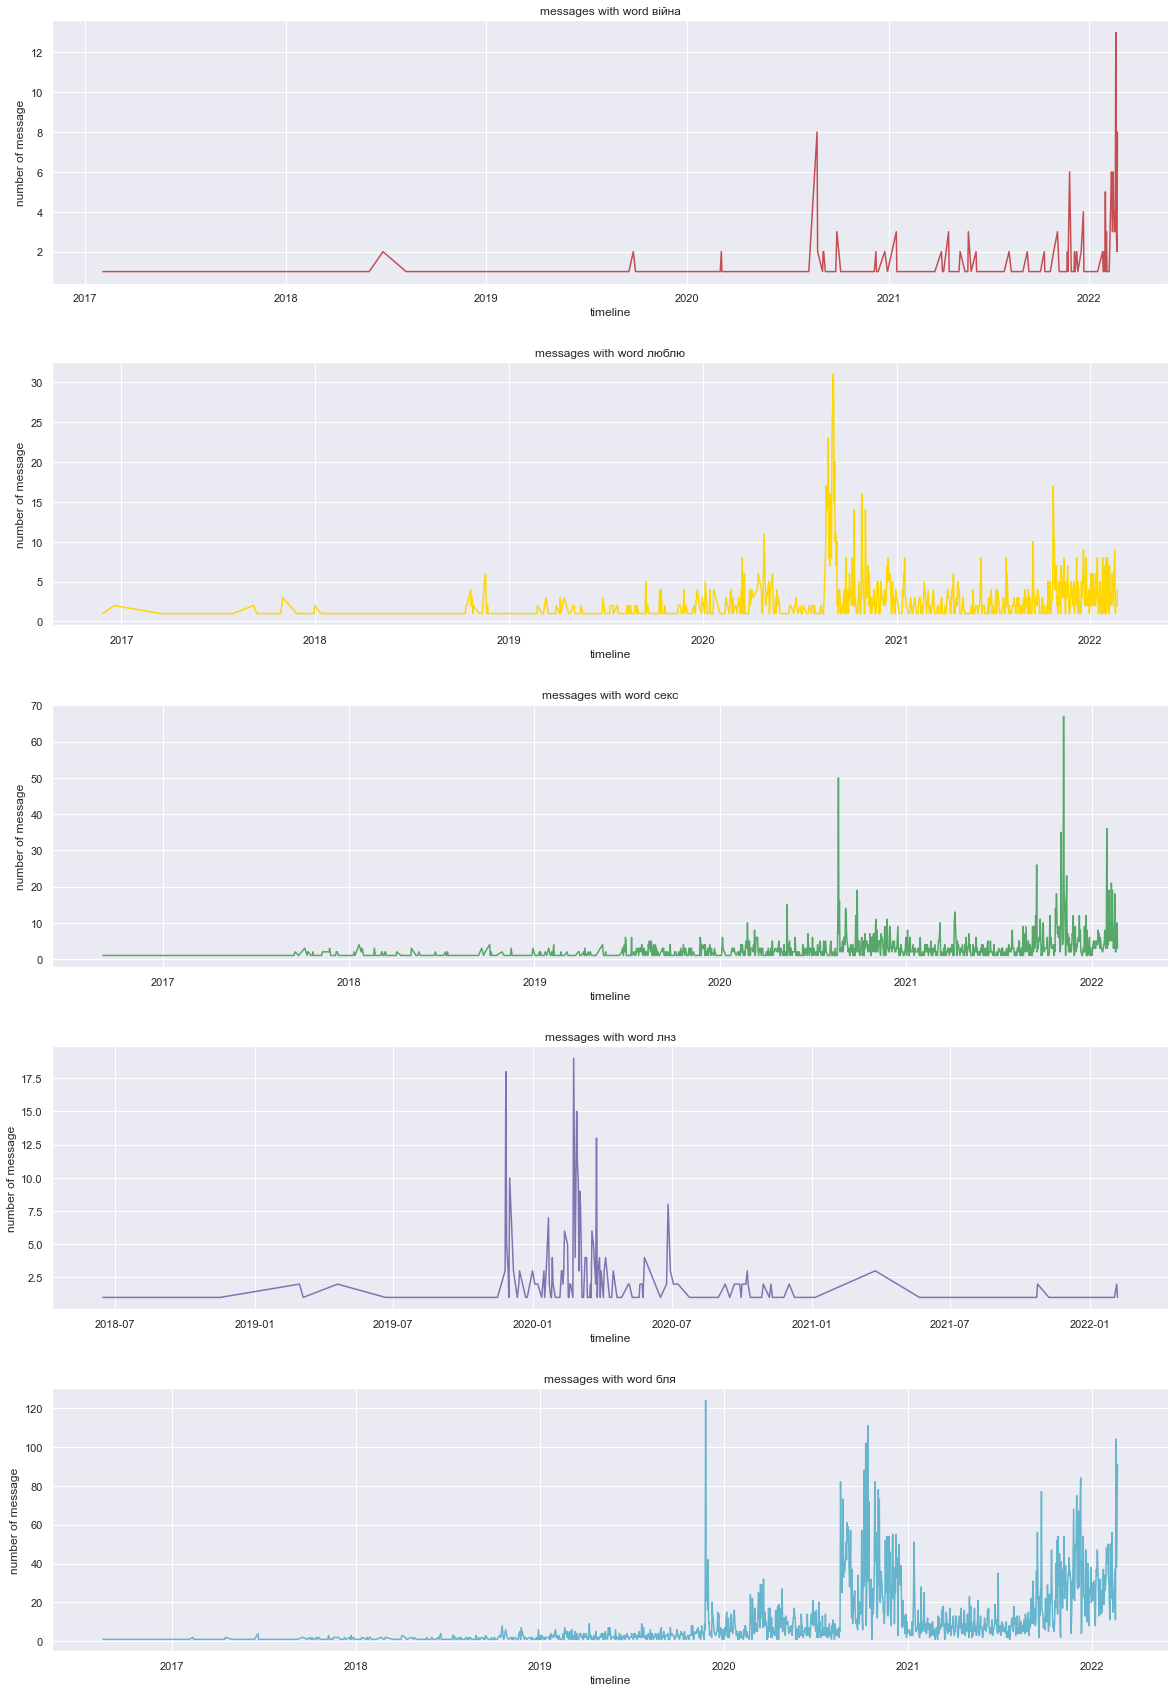

In [206]:
fig, ax = plt.subplots()
fig.set_size_inches(20,30)
words = ['війна','люблю','секс','лнз','бля']
colors = ['r', 'gold', 'g', 'm', 'c']

for number, word in enumerate(words):
    plt.subplot(5,1,number + 1)
    temp_df = df[df['message'].str.lower().str.contains(word) == True]
    temp_df = temp_df.groupby('date', as_index=False).count()
    x=temp_df['date']
    y=temp_df['message']
    plt.plot(x, y, color=colors[number])
    plt.title("messages with word " + word)
    plt.ylabel(u'number of message')
    plt.xlabel(u'timeline')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

sns.set(style="darkgrid")

plt.show()

8. Compare the number of times you have received and sent the word and show the result on the diagram

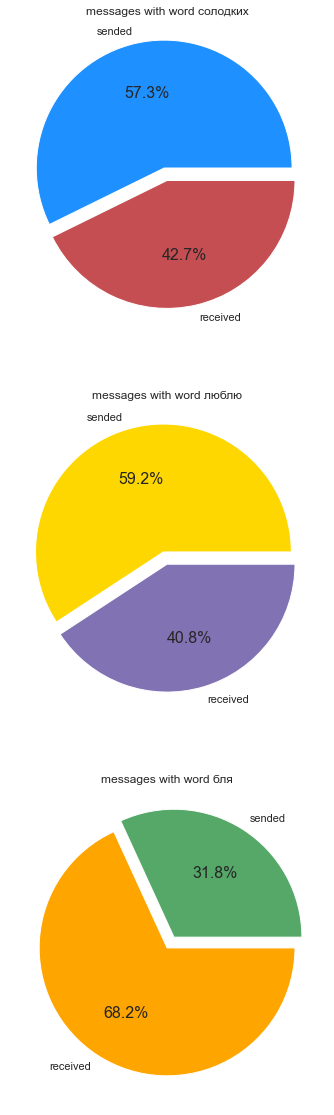

In [213]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_size_inches(10,20)
words = ['солодких','люблю','бля']
explode = (0.1, 0)
colors1 = ['dodgerblue','r']
colors2 = ['gold', 'm']
colors3 = ['g', 'orange']

x1  = df[(df['message'].str.lower().str.contains(words[0]) == True) & (df['from_id'] == my_id)].count()
x2  = df[(df['message'].str.lower().str.contains(words[0]) == True) & (df['to_id'] == my_id)].count()
ax1.set_title("messages with word " + words[0])
values1 = [x1[0], x2[0]]
labes1 = ['sended', 'received']
ax1.pie(values1, labels=labes1, autopct='%1.1f%%', colors = colors1, explode = explode)


x3  = df[(df['message'].str.lower().str.contains(words[1]) == True) & (df['from_id'] == my_id)].count()
x4  = df[(df['message'].str.lower().str.contains(words[1]) == True) & (df['to_id'] == my_id)].count()
ax2.set_title("messages with word " + words[1])
values2 = [x3[0], x4[0]]
labes2 = ['sended', 'received']
ax2.pie(values2, labels=labes2, autopct='%1.1f%%', colors = colors2,explode = explode)


x4  = df[(df['message'].str.lower().str.contains(words[2]) == True) & (df['from_id'] == my_id)].count()
x5  = df[(df['message'].str.lower().str.contains(words[2]) == True) & (df['to_id'] == my_id)].count()
ax3.set_title("messages with word " + words[2])
values3 = [x4[0], x5[0]]
labes3 = ['sended', 'received']
ax3.pie(values3, labels=labes3, autopct='%1.1f%%', colors = colors3,explode = explode)

    

plt.show()

9. Find out the number of text messages received and sent by certain categories of time

    9.1 SMS received and sent by days of week

    9.2 SMS received or sent by months

    9.3 SMS received and sent by hours

9.1 SMS received and sent by days of week

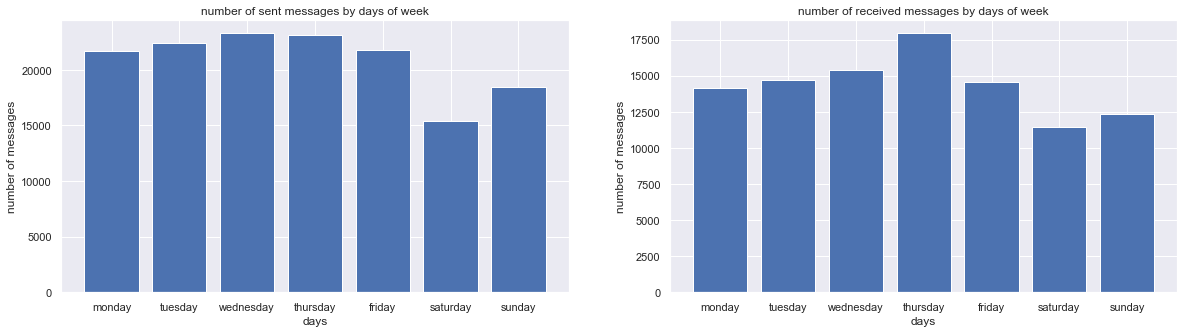

In [93]:
days = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']

new_df = df[(df['from_id'] == my_id)]
new_df['date'] = df['date'].apply(lambda x: x.isoweekday())

vals = new_df.groupby('date')['date'].count()

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(20,5) 

ax1.bar(days, vals)
ax1.set_title('number of sent messages by days of week')
ax1.set_ylabel(u'number of messages')
ax1.set_xlabel(u'days')
plt.rcParams['font.size'] = '16'


new_df = df[(df['to_id'] == my_id)]
new_df['date'] = df['date'].apply(lambda x: x.isoweekday())
new_df.head(20)

vals2 = new_df.groupby('date')['date'].count()

sns.set(style="darkgrid")
ax2.bar(days, vals2)
ax2.set_title('number of received messages by days of week')
ax2.set_ylabel(u'number of messages')
ax2.set_xlabel(u'days')
plt.rcParams['font.size'] = '16'


plt.show()

9.2 SMS received or sent by months

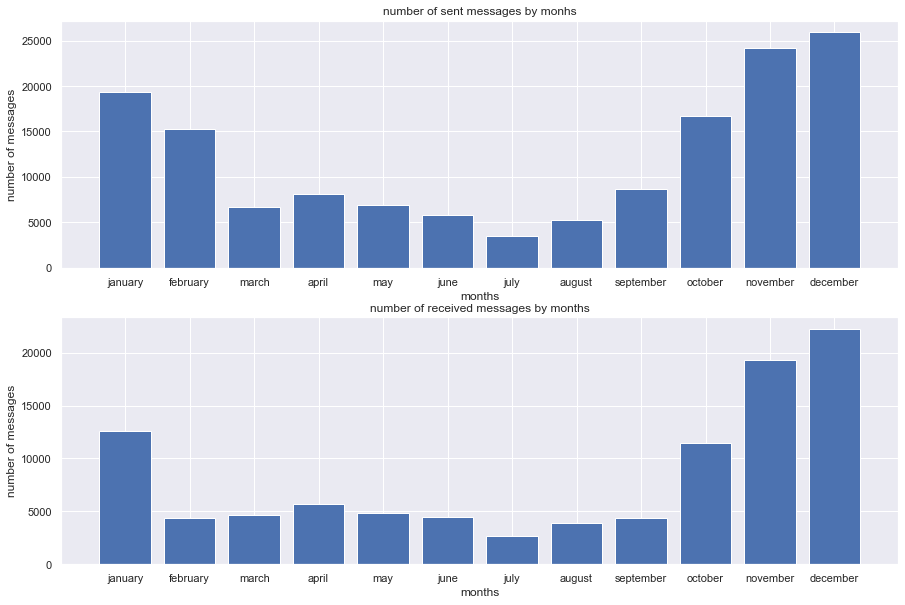

In [94]:
months = ['january','february','march','april','may','june','july','august','september','october','november','december']

new_df = df[(df['from_id'] == my_id)]
new_df['date'] = df['date'].apply(lambda x: x.month)

vals = new_df.groupby('date')['date'].count()

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(15,10) 

ax1.bar(months, vals)
ax1.set_title('number of sent messages by monhs')
ax1.set_ylabel(u'number of messages')
ax1.set_xlabel(u'months')
plt.rcParams['font.size'] = '16'

new_df = df[(df['to_id'] == my_id)]
new_df['date'] = df['date'].apply(lambda x: x.month)
new_df.head(20)

vals2 = new_df.groupby('date')['date'].count()

sns.set(style="darkgrid")
ax2.bar(months, vals2)
ax2.set_title('number of received messages by months')
ax2.set_ylabel(u'number of messages')
ax2.set_xlabel(u'months')
plt.rcParams['font.size'] = '16'



plt.show()

9.3 SMS received and sent by hours

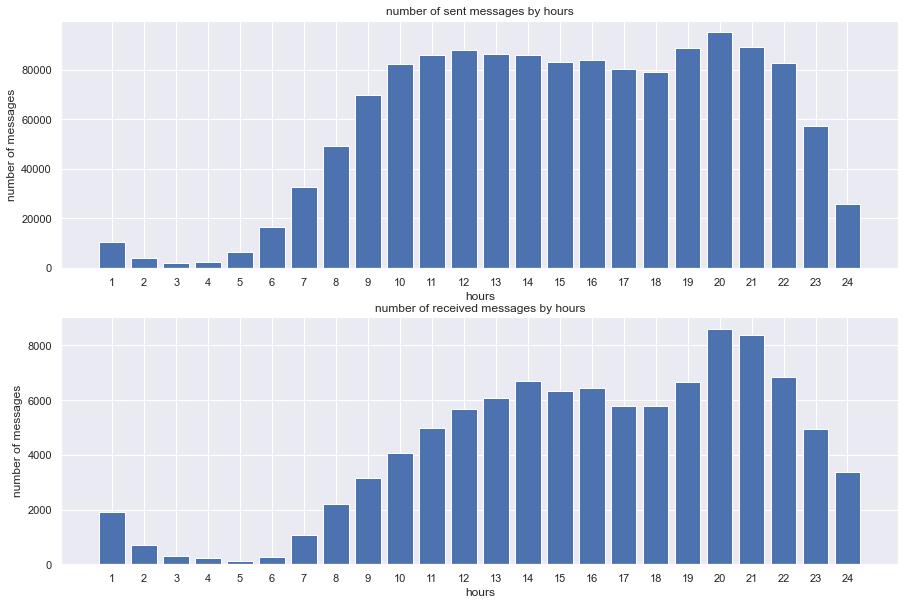

In [69]:
df_new_date = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_new_date['date'] = pd.to_datetime(df_new_date['date'])

hours = [str(i) for i in range(1,25)]

new_df = df_new_date[(df_new_date['from_id'] == my_id)]
new_df['date'] = df_new_date['date'].apply(lambda x: x.hour)

vals = new_df.groupby('date')['date'].count()

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(15,10) 

ax1.bar(hours, vals)
ax1.set_title('number of sent messages by hours')
ax1.set_ylabel(u'number of messages')
ax1.set_xlabel(u'hours')
plt.rcParams['font.size'] = '16'

new_df = df_new_date[(df_new_date['to_id'] == my_id)]
new_df['date'] = df_new_date['date'].apply(lambda x: x.hour)

vals_2 = new_df.groupby('date')['date'].count()

sns.set(style="darkgrid")
ax2.bar(hours, vals_2)
ax2.set_title('number of received messages by hours')
ax2.set_ylabel(u'number of messages')
ax2.set_xlabel(u'hours')
plt.rcParams['font.size'] = '16'


plt.show()

10. Investigate which words you receive and send most often. Visualise the results

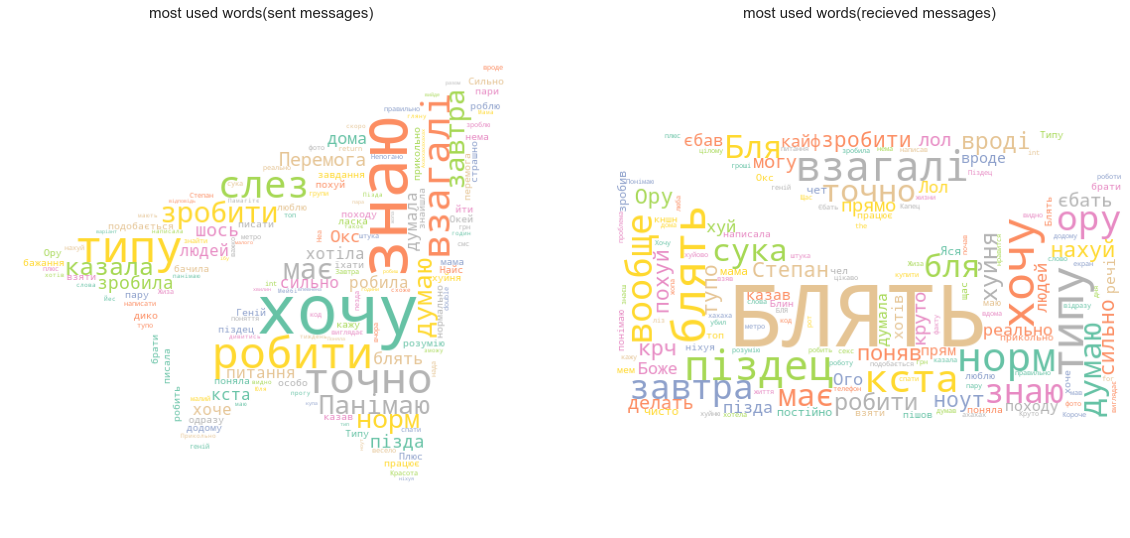

In [200]:
def readFile(fileName):
    with open(fileName, 'r') as f:
        words = f.read().splitlines()
    return words

words = []
stopwords_ru = get_stop_words('russian')
stopwords_ua = readFile('C:/Users/Kuziomko/Desktop/Книга1.txt')

def get_words(df):
    words = []
    for ind in df['message'].index:
        for word in str(df['message'][ind]).split():
            word.replace(".","")
            if (word.lower() not in stopwords_ua) and (word.lower() not in stopwords_ru) and (word.lower() != 'nan') and (word.isalpha()) and (len(word)>2):
                words.append(word)
    return words

mask1 = np.array(Image.open('C:/Users/Kuziomko/Desktop/1252477.png'))
mask2 = np.array(Image.open('C:/Users/Kuziomko/Desktop/1051317.png'))

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(20,10)

sent_df = df[df['from_id'] == my_id]
c_sent = get_words(sent_df)
wordcount = pd.value_counts(np.array(c_sent))
wordcloud = WordCloud(colormap='Set2', 
                          collocations=False, 
                          background_color="white", 
                          width=2500, 
                          height=2500, 
                          max_words=150,
                          mask=mask2).generate_from_frequencies(wordcount)
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('most used words(sent messages)', fontsize = 15)

received_df = df[df['to_id'] == my_id]
c_received = get_words(received_df)
wordcount = pd.value_counts(np.array(c_received))
wordcloud = WordCloud(colormap='Set2', 
                          collocations=False, 
                          background_color="white", 
                          width=2500, 
                          height=2500, 
                          max_words=150,
                          mask=mask1).generate_from_frequencies(wordcount)
ax2.imshow(wordcloud)
ax2.axis('off')
ax2.set_title('most used words(recieved messages)', fontsize = 15)

plt.show()

# Dialogs data analysis

1. Make a pie chart of chats size
    
    1.1 Number of participants in the top 15 chats
    
    1.2 Number of participants in the 15 smallest chats


1.1 Number of participants in the top 15 chats

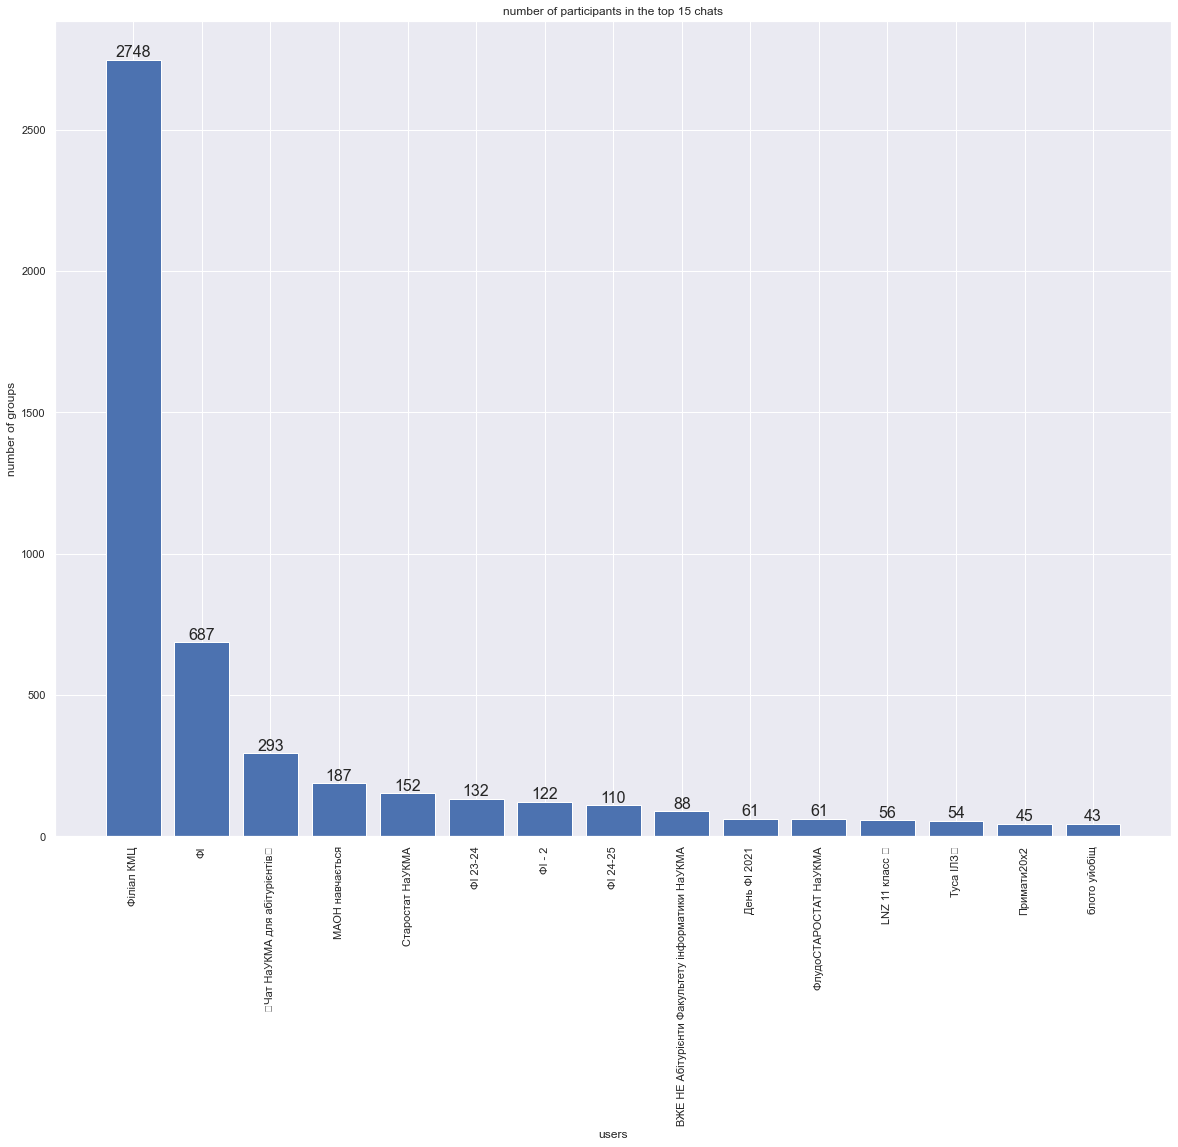

In [67]:
groups = df_meta[(df_meta['type'] == 'Group')]
groups_stat = groups.groupby('name', as_index=False)['users'].count()
groups_stat = groups_stat.sort_values(by='users', ascending=False).head(15)
explode = [0, 0.1,0.1, 0.1,0.1, 0.1,0.1, 0.1,0.1, 0.1,0.1, 0.1,0.1, 0.1,0.1]

x=groups_stat['name']
y=groups_stat['users']

fig, ax = plt.subplots()
fig.set_size_inches(20,15)
plt.bar(x, y)
plt.title('number of participants in the top 15 chats')
plt.ylabel(u'number of groups')
plt.xlabel(u'users')
autolabel(ax.patches, height_factor=1)
plt.xticks(rotation=90)
plt.rcParams['font.size'] = '16'



plt.show()

1.2 Number of participants in the 15 smallest chats

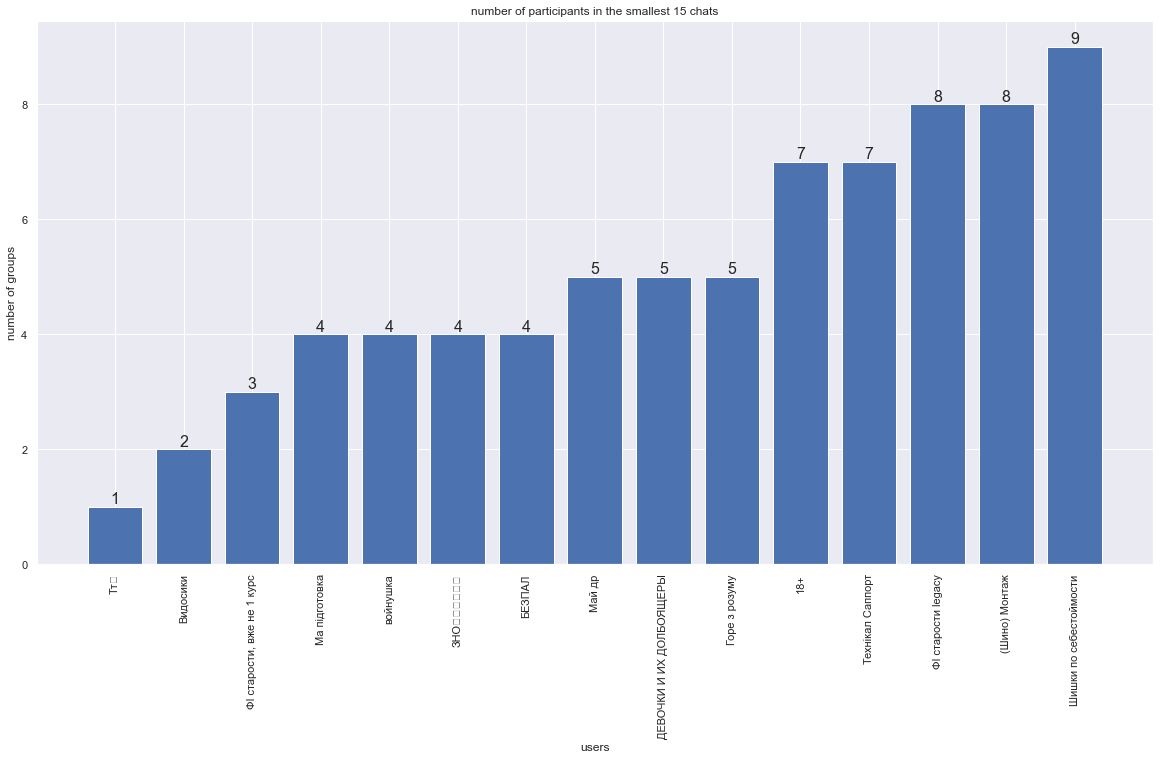

In [66]:
groups = df_meta[(df_meta['type'] == 'Group')]
groups_stat = groups.groupby('name', as_index=False)['users'].count()
groups_stat = groups_stat.sort_values(by='users').head(15)
explode = [0.1, 0.1,0.1, 0.1,0.1, 0.1,0.1, 0.1,0.1, 0.1,0.1, 0.1,0.1, 0.1,0.1]

x=groups_stat['name']
y=groups_stat['users']

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
plt.bar(x, y)
plt.title('number of participants in the smallest 15 chats')
plt.ylabel(u'number of groups')
plt.xlabel(u'users')
autolabel(ax.patches, height_factor=1)
plt.xticks(rotation=90)


plt.show()

2. Show the ratio of all types of dialogue to the number of dialogue of each type on the diagram

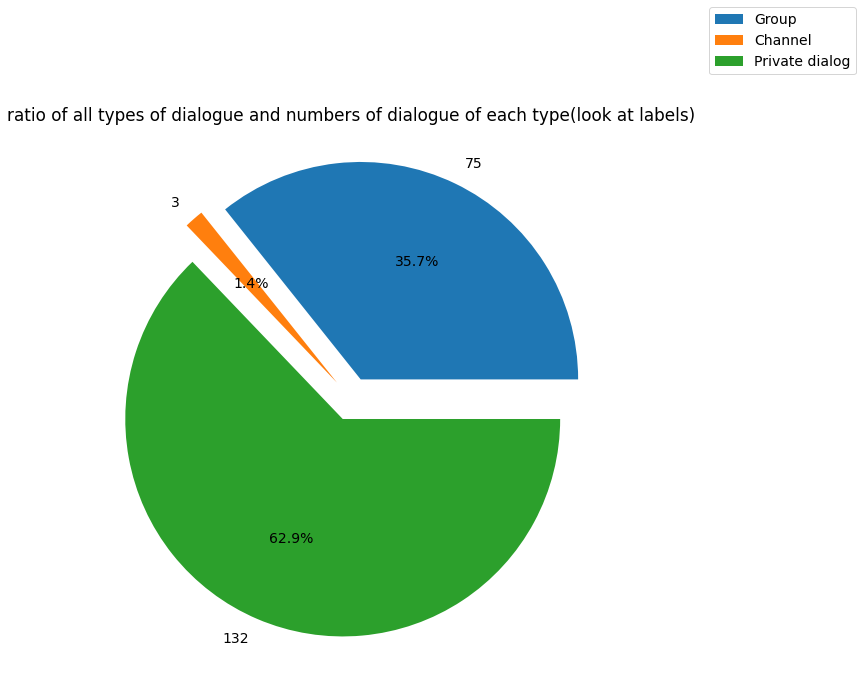

In [488]:
types = df_meta['type'].unique()
explode = [0.1, 0.1, 0.1]

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
val = df_meta.groupby('name')['type'].apply(str).reset_index()
x1 = val[val['type'].str.contains(types[0])==True].count()
x2 = val[val['type'].str.contains(types[1])==True].count()
x3 = val[val['type'].str.contains(types[2])==True].count()
vals = [x1[0], x2[0], x3[0]]
labels = list(df_meta.groupby('type')['type'].count().index)
ax.pie(vals, labels=vals, autopct='%1.1f%%', explode = explode)
plt.legend(types, bbox_to_anchor=(1,1), loc = 'center left', bbox_transform=plt.gcf().transFigure)
ax.set_title("ratio of all types of dialogue and numbers of dialogue of each type(look at labels)")
plt.show()

3. Find the number of common groups with members from chat groups

    3.1 Our TG group - Примати20х2
    
    3.2 Group with my friends - войнушка

3.1 Our TG group - Примати20х2

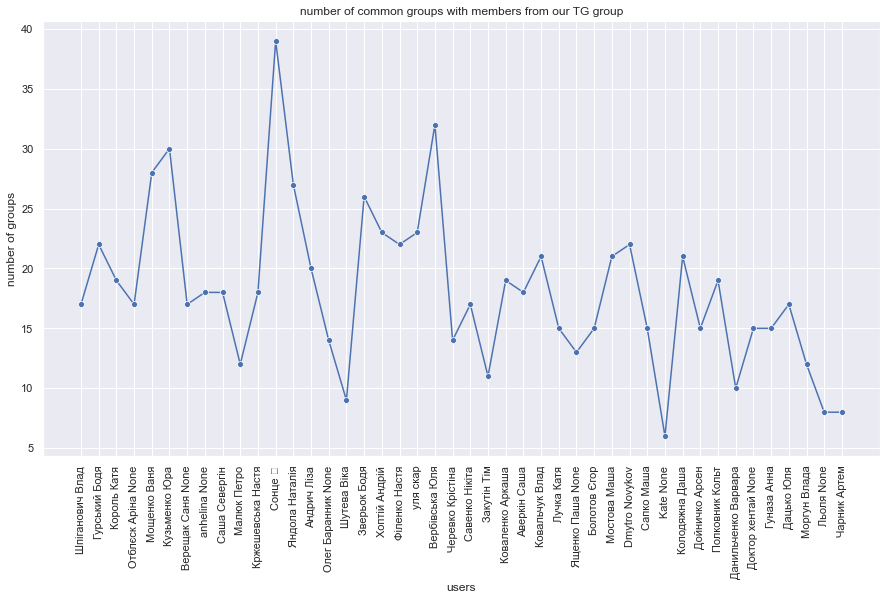

In [43]:
our_group = df_meta[df_meta['name'].str.contains('Примати20х2')]
our_group['users'] = our_group['users'].apply(lambda x: eval(x))
list_users = our_group['users'].apply(lambda x: x['user_id']).to_list()
names_users = our_group['users'].apply(lambda x: str(x['first_name']) + ' ' + str(x['last_name'])).to_list()
groups_number = []
colors=[]

for x in list_users:
    gh = df_meta[df_meta['users'].str.contains(str(x))].count()
    groups_number.append(gh[0])
    col = "#"+''.join(random.choice('ABCDEF0123456789') for i in range(6))
    colors.append(str(col))
    
names_users.pop(10)
groups_number.pop(10)

plt.figure(figsize = (15,8))
sns.set(style="darkgrid")
sns.lineplot(x=names_users, y=groups_number, linestyle='-', marker='o')
plt.xticks(rotation=90)
plt.title('number of common groups with members from our TG group')
plt.ylabel(u'number of groups')
plt.xlabel(u'users')
plt.rcParams['font.size'] = '20'



plt.show()

3.2 Group with my friends - войнушка

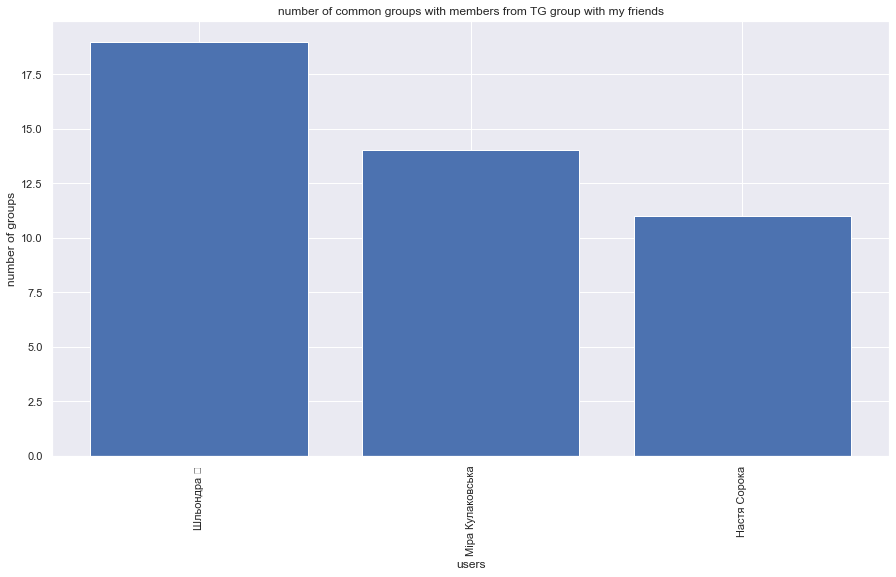

In [19]:
our_group = df_meta[df_meta['name'].str.contains('войнушка')]
our_group['users'] = our_group['users'].apply(lambda x: eval(x))
list_users = our_group['users'].apply(lambda x: x['user_id']).to_list()
names_users = our_group['users'].apply(lambda x: str(x['first_name']) + ' ' + str(x['last_name'])).to_list()
groups_number = []
colors=[]

for x in list_users:
    gh = df_meta[df_meta['users'].str.contains(str(x))].count()
    groups_number.append(gh[0])
    col = "#"+''.join(random.choice('ABCDEF0123456789') for i in range(6))
    colors.append(str(col))
    
names_users.pop(0)
groups_number.pop(0)

plt.figure(figsize = (15,8))
sns.set(style="darkgrid")
plt.bar(names_users, groups_number)
plt.xticks(rotation=90)
plt.title('number of common groups with members from TG group with my friends')
plt.ylabel(u'number of groups')
plt.xlabel(u'users')
plt.rcParams['font.size'] = '20'



plt.show()

4. Find out and analyse which words are most used in the chats headlines

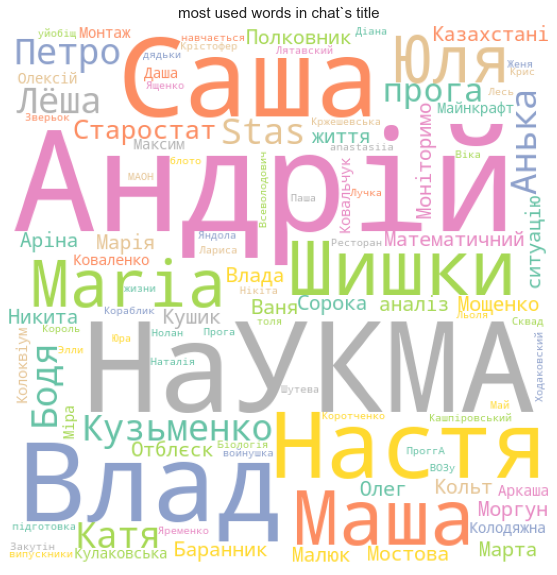

In [203]:
df_meta_2 = df_meta.groupby('name')['type'].apply(str).reset_index()

def readFile(fileName):
    with open(fileName, 'r') as f:
        words = f.read().splitlines()
    return words

words = []
stopwords_ru = get_stop_words('russian')
stopwords_ua = readFile('C:/Users/Kuziomko/Desktop/Книга1.txt')

def get_words(df):
    words = []
    for ind in df['name'].index:
        for word in str(df['name'][ind]).split():
            word.replace(".","")
            if (word.lower() not in stopwords_ua) and (word.lower() not in stopwords_ru) and (word.lower() != 'nan') and (word.isalpha()) and (len(word)>2):
                words.append(word)
    return words


fig, ax = plt.subplots()
fig.set_size_inches(10,10)


cloud_words = get_words(df_meta_2)
wordcount = pd.value_counts(np.array(cloud_words))
wordcloud = WordCloud(colormap='Set2', 
                          collocations=False, 
                          background_color="white", 
                          width=2000, 
                          height=2000, 
                          max_words=100,
                          min_font_size = 20).generate_from_frequencies(wordcount)
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('most used words in chat`s title', fontsize = 15)

plt.show()

# Merged data

In [7]:
help_merge = df_meta.copy().drop_duplicates(subset = 'dialog_id', keep = 'first').drop('users', axis = 1)
df_merged = pd.merge(df, help_merge, on = "dialog_id")
df_merged.rename(columns = {'type_x':'type_message', 'type_y':'type_dialog'}, inplace = True)

df_merged.head(10)

id        date      from_id                               to_id  \
0  679546  2022-02-21  435367479.0  PeerChannel(channel_id=1124109395)   
1  679545  2022-02-21  435367479.0  PeerChannel(channel_id=1124109395)   
2  679544  2022-02-21  780169597.0  PeerChannel(channel_id=1124109395)   
3  679543  2022-02-21  345338423.0  PeerChannel(channel_id=1124109395)   
4  679542  2022-02-21  392821077.0  PeerChannel(channel_id=1124109395)   
5  679541  2022-02-21  302784024.0  PeerChannel(channel_id=1124109395)   
6  679540  2022-02-21  302784024.0  PeerChannel(channel_id=1124109395)   
7  679539  2022-02-21  302784024.0  PeerChannel(channel_id=1124109395)   
8  679538  2022-02-21  387718984.0  PeerChannel(channel_id=1124109395)   
9  679537  2022-02-21  475253228.0  PeerChannel(channel_id=1124109395)   

  fwd_from                                            message type_message  \
0      NaN                        Внебрачное дитя Илона Маска         text   
1      NaN                                     А тэг прям сок         text   
2      NaN  андрєй андрєєв кстаті навіть не мєм може бути,...         text   
3      NaN  Випускниках Харківського танкового училища?\nВ...         text   
4      NaN                    активістам відділу кібербулінгу         text   
5      NaN                          Якщо все інше вже роздали         text   
6      NaN                              А кому тоді «Оплоти»?         text   
7      NaN                           Але те, яке нам потрібно         text   
8      NaN              Не таке відновлення їдальні ми хотіли         text   
9      NaN                                         вся правда         text   

   duration      dialog_id        name type_dialog  
0       NaN -1001124109395  Філіал КМЦ       Group  
1       NaN -1001124109395  Філіал КМЦ       Group  
2       NaN -1001124109395  Філіал КМЦ       Group  
3       NaN -1001124109395  Філіал КМЦ       Group  
4       NaN -1001124109395  Філіал КМЦ       Group  
5       NaN -1001124109395  Філіал КМЦ       Group  
6       NaN -1001124109395  Філіал КМЦ       Group  
7       NaN -1001124109395  Філіал КМЦ       Group  
8       NaN -1001124109395  Філіал КМЦ       Group  
9       NaN -1001124109395  Філіал КМЦ       Group

1. Visualise the top people I have texted the most and who have texted me the most

    1.1 Top 10 people I have texted the most
    
    1.2 Top people who have texted me the most
    
    During the course of the study, I found that not all of the сhats were downloaded for some reason. I was not able to fix it, so these diagrams are not very correct in terms of life, but according to the data, everything is OK.

1.1 Top 10 people I have texted the most

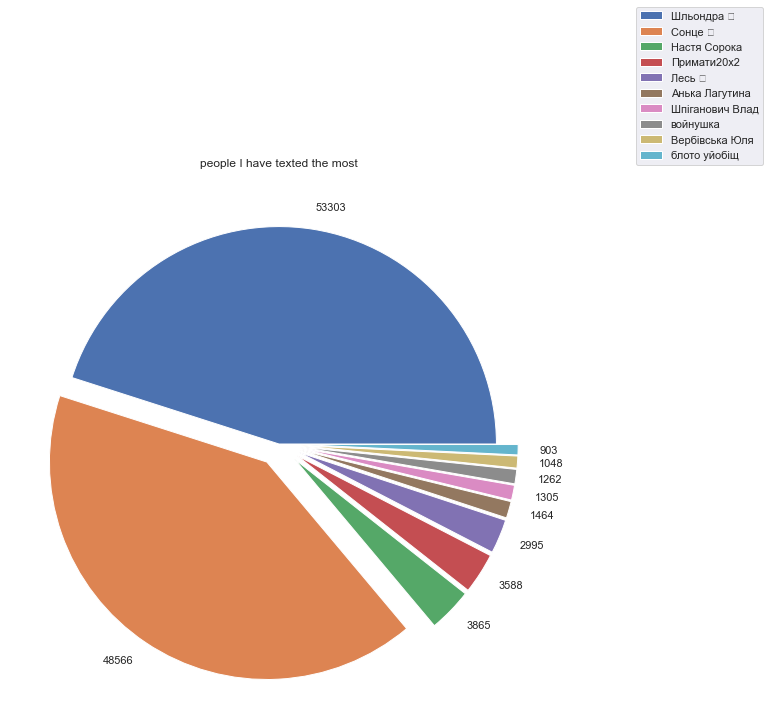

In [203]:
i_sent = df_merged[df_merged['from_id'] == my_id]
explode = [0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
i_sent_stats = i_sent.groupby('name', as_index=False)['dialog_id'].count().rename(columns={'dialog_id':'number_of_message'})

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
val = i_sent_stats.sort_values(by='number_of_message', ascending=False).head(10)
x1 = val['number_of_message']
labels = val['name']
ax.pie(x1, labels=x1,explode=explode)
plt.rcParams['font.size'] = '20'
plt.legend(labels, bbox_to_anchor=(1,1), loc = 'center left', bbox_transform=plt.gcf().transFigure)
ax.set_title("people I have texted the most")
plt.show()

1.2 Top people who have texted me the most

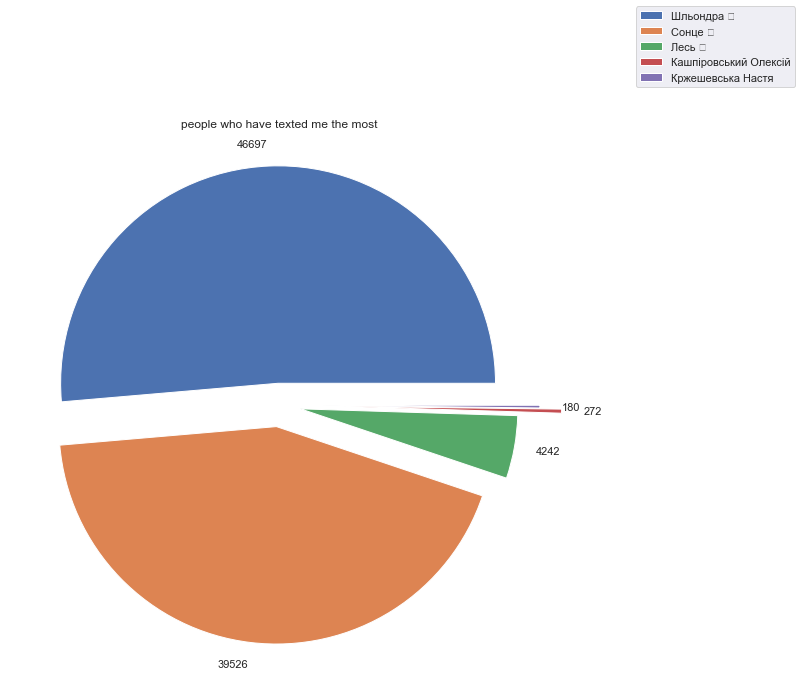

In [23]:
i_received = df_merged[(df_merged['to_id'] == my_id)]
explode = [0.1,0.1,0.1,0.3,0.2]
i_received_stats = i_received.groupby('name', as_index=False)['dialog_id'].count().rename(columns={'dialog_id':'number_of_message'})
i_received_stats.sort_values(by='number_of_message', ascending=False).head(5)
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
val = i_received_stats.sort_values(by='number_of_message', ascending=False).head(5)
x1 = val['number_of_message']
labels = val['name']
ax.pie(x1, labels=x1,explode=explode)
plt.rcParams['font.size'] = '20'
plt.legend(labels, bbox_to_anchor=(1,1), loc = 'center left', bbox_transform=plt.gcf().transFigure)
ax.set_title("people who have texted me the most")
plt.show()

2. Investigate which words you receive and send(in one cloude) most often in 2 particular groups. Visualise the results

    2.1 Our TG group - Примати20х2
    
    2.2 The biggest university's group - Філіал КМЦ

2.1 Our TG group - Примати20х2

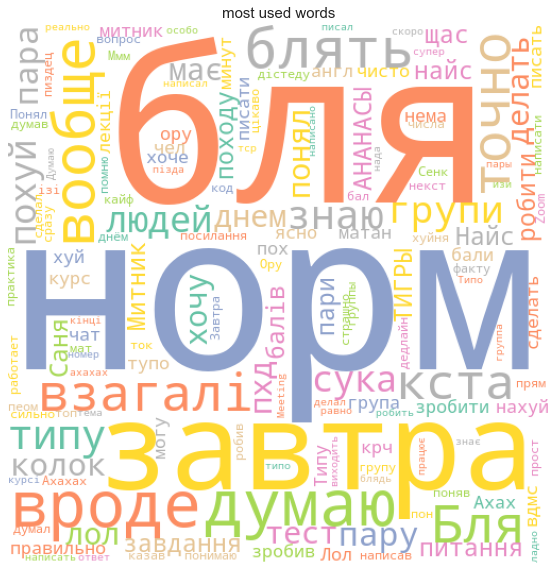

In [205]:
new_df_merged = df_merged[df_merged['name'].str.contains('Примати20х2') == True]

def readFile(fileName):
    with open(fileName, 'r') as f:
        words = f.read().splitlines()
    return words

words = []
stopwords_ru = get_stop_words('russian')
stopwords_ua = readFile('C:/Users/Kuziomko/Desktop/Книга1.txt')

def get_words(df):
    words = []
    for ind in df['message'].index:
        for word in str(df['message'][ind]).split():
            word.replace(".","")
            if (word.lower() not in stopwords_ua) and (word.lower() not in stopwords_ru) and (word.lower() != 'nan') and (word.isalpha()) and (len(word)>2):
                words.append(word)
    return words


fig, ax = plt.subplots()
fig.set_size_inches(10,10)


c_sent = get_words(new_df_merged)
wordcount = pd.value_counts(np.array(c_sent))
wordcloud = WordCloud(colormap='Set2', 
                          collocations=False, 
                          background_color="white", 
                          width=2500, 
                          height=2500, 
                          max_words=250,
                          min_font_size = 20).generate_from_frequencies(wordcount)
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('most used words', fontsize = 15)

plt.show()

2.2 The biggest university's group - Філіал КМЦ

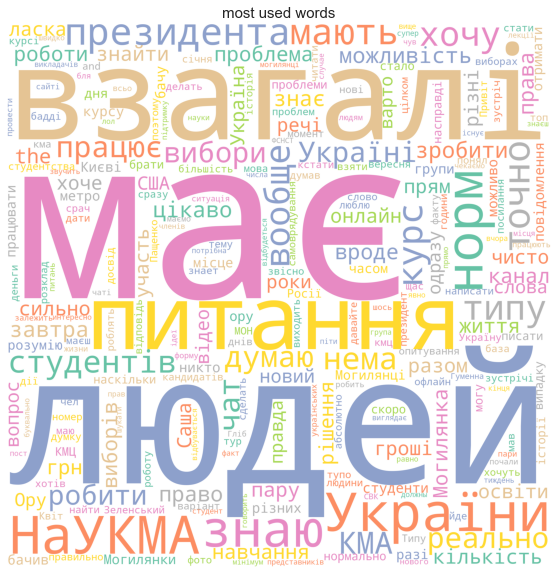

In [187]:
new_df_merged = df_merged[df_merged['name'].str.contains('Філіал КМЦ') == True]

def readFile(fileName):
    with open(fileName, 'r') as f:
        words = f.read().splitlines()
    return words

words = []
stopwords_ru = get_stop_words('russian')
stopwords_ua = readFile('C:/Users/Kuziomko/Desktop/Книга1.txt')

def get_words(df):
    words = []
    for ind in df['message'].index:
        for word in str(df['message'][ind]).split():
            word.replace(".","")
            if (word.lower() not in stopwords_ua) and (word.lower() not in stopwords_ru) and (word.lower() != 'nan') and (word.isalpha()) and (len(word)>2):
                words.append(word)
    return words



fig, ax = plt.subplots()
fig.set_size_inches(10,10)


c_sent = get_words(new_df_merged)
wordcount = pd.value_counts(np.array(c_sent))
wordcloud = WordCloud(colormap='Set2', 
                          collocations=False, 
                          background_color="white", 
                          width=2500, 
                          height=2500, 
                          max_words=150,
                          mask=mask4).generate_from_frequencies(wordcount)
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('most used words', fontsize = 15)

plt.show()

3. To investigate in which chats particular word is most often used. Find the top 10

    3.1 Across the entire dataframe

    3.2 Across sent message (top-5)

    3.3 Across received message (top-5)

3.1 Across the entire dataframe

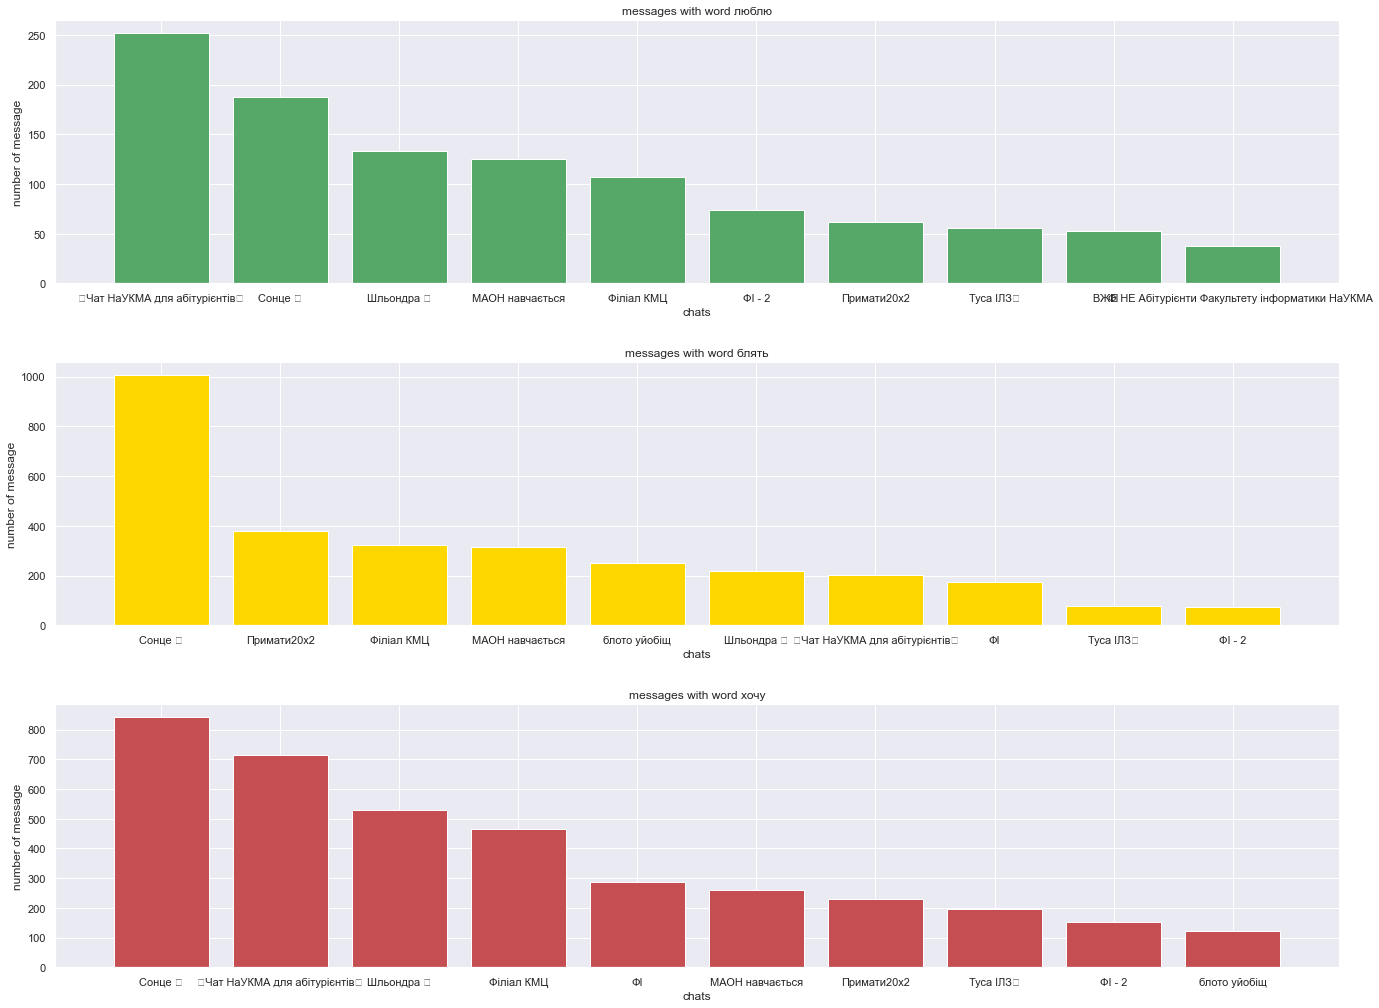

In [246]:
fig, ax = plt.subplots()
fig.set_size_inches(23,30)
words = ['люблю', 'блять', 'хочу']
colors = ['g', 'gold', 'r']

for number, word in enumerate(words):
    df_words = df_merged[(df_merged['message'].str.contains(word) == True)]
    plt.subplot(5,1,number + 1)
    df_words = df_words.groupby('name', as_index=False)['message'].count()
    df_words = df_words.sort_values(by='message', ascending=False).head(10)
    x=df_words['name']
    y=df_words['message']
    plt.bar(x, y, color=colors[number])
    plt.title('messages with word ' + word)
    plt.ylabel(u'number of message')
    plt.xlabel(u'chats')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
sns.set(style="darkgrid")
plt.show()

3.2 Across sent message (top-5)

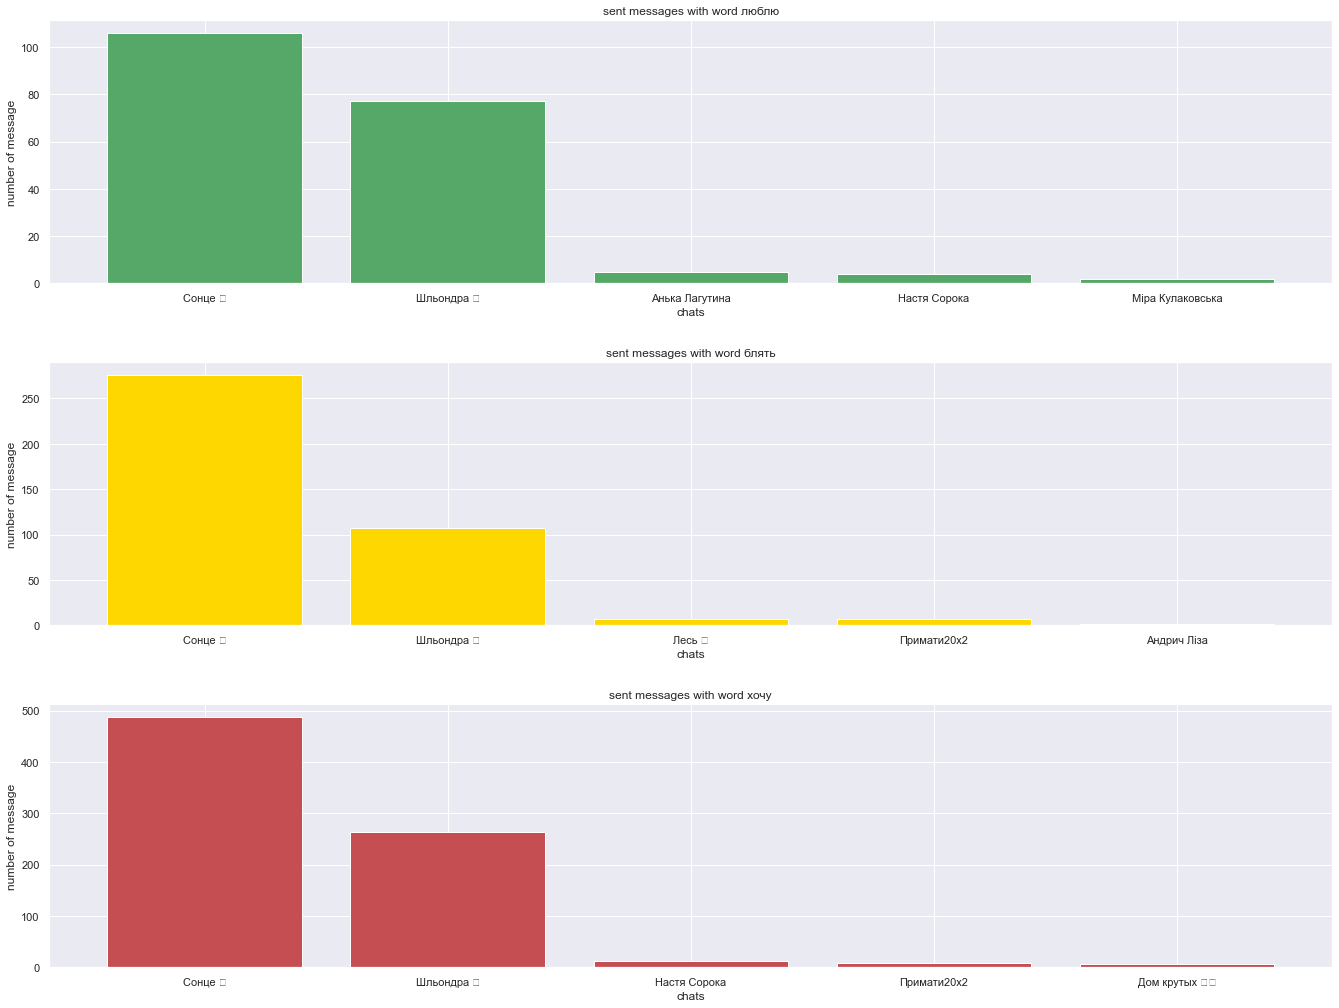

In [272]:
df_merged['from_id'] = df_merged['from_id'].apply(lambda x: np.int64(x.strip().split('=')[-1].replace(")", "")) if type(x) != float else x)

fig, ax = plt.subplots()
fig.set_size_inches(23,30)
words = ['люблю', 'блять', 'хочу']
colors = ['g', 'gold', 'r']

for number, word in enumerate(words):
    df_words = df_merged[(df_merged['message'].str.contains(word) == True) & (df_merged['from_id']==my_id)]
    plt.subplot(5,1,number + 1)
    df_words = df_words.groupby('name', as_index=False)['message'].count()
    df_words = df_words.sort_values(by='message', ascending=False).head(5)
    x=df_words['name']
    y=df_words['message']
    plt.bar(x, y, color=colors[number])
    plt.title('sent messages with word ' + word)
    plt.ylabel(u'number of message')
    plt.xlabel(u'chats')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
sns.set(style="darkgrid")
plt.show()

3.3 Across received message (top-5)

some chats have been less, because not everyone has written the word in private conversations

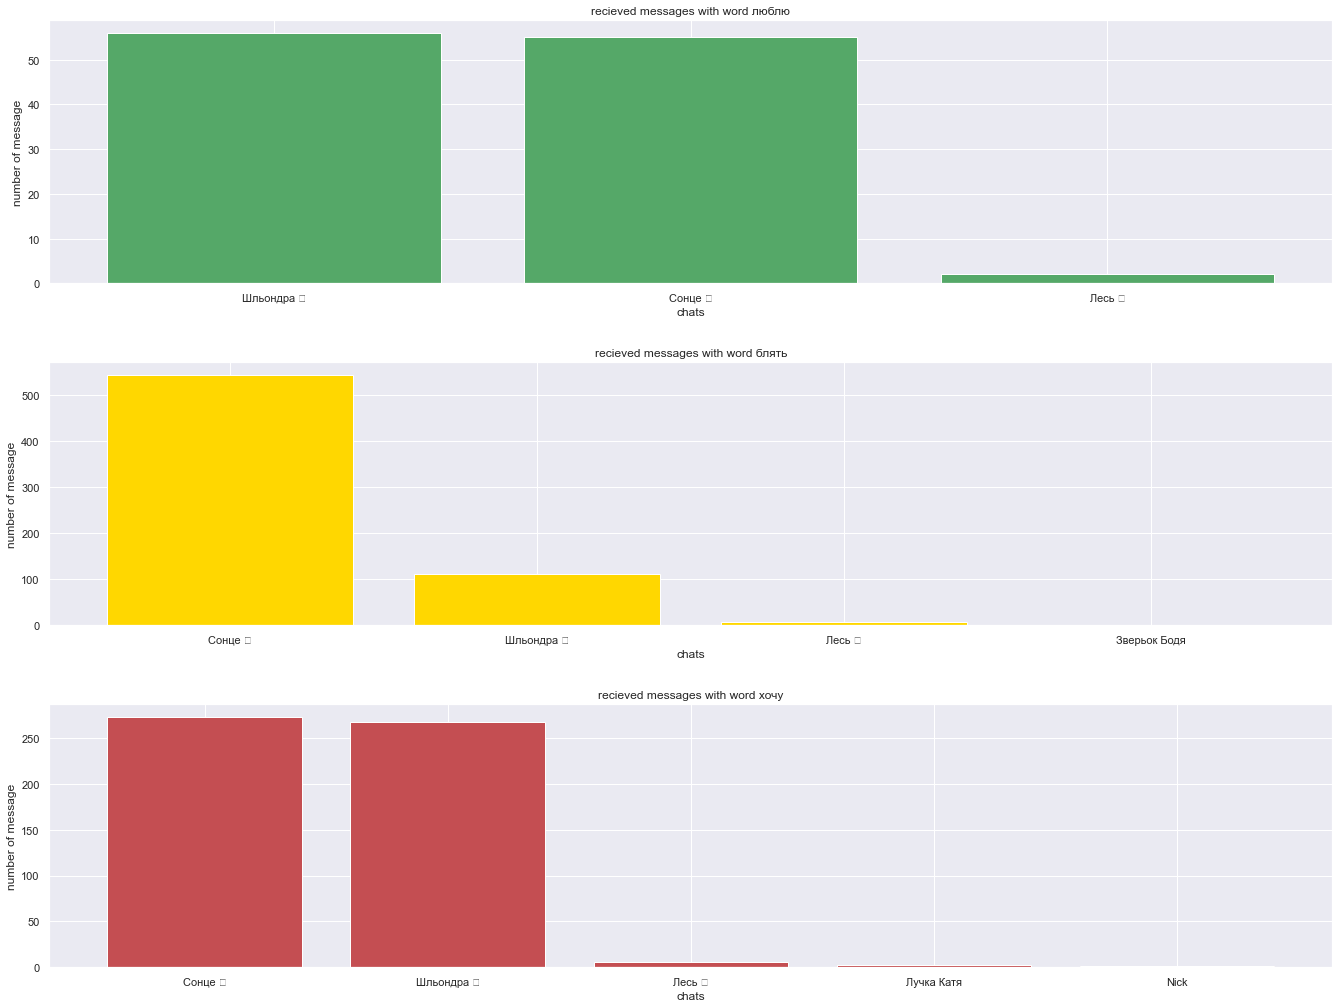

In [253]:
fig, ax = plt.subplots()
fig.set_size_inches(23,30)
words = ['люблю', 'блять', 'хочу']
colors = ['g', 'gold', 'r']

for number, word in enumerate(words):
    df_words = df_merged[(df_merged['message'].str.contains(word) == True) & (df_merged['to_id']==my_id)]
    plt.subplot(5,1,number + 1)
    df_words = df_words.groupby('name', as_index=False)['message'].count()
    df_words = df_words.sort_values(by='message', ascending=False).head(5)
    x=df_words['name']
    y=df_words['message']
    plt.bar(x, y, color=colors[number])
    plt.title('recieved messages with word ' + word)
    plt.ylabel(u'number of message')
    plt.xlabel(u'chats')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
sns.set(style="darkgrid")
plt.show()

4. To investigate in which chats particular emoji is most often used. Find the top 10

    4.1 Across the entire dataframe

    4.2 Across sent message (top-5)

    4.3 Across received message (top-5)

4.1 Across the entire dataframe

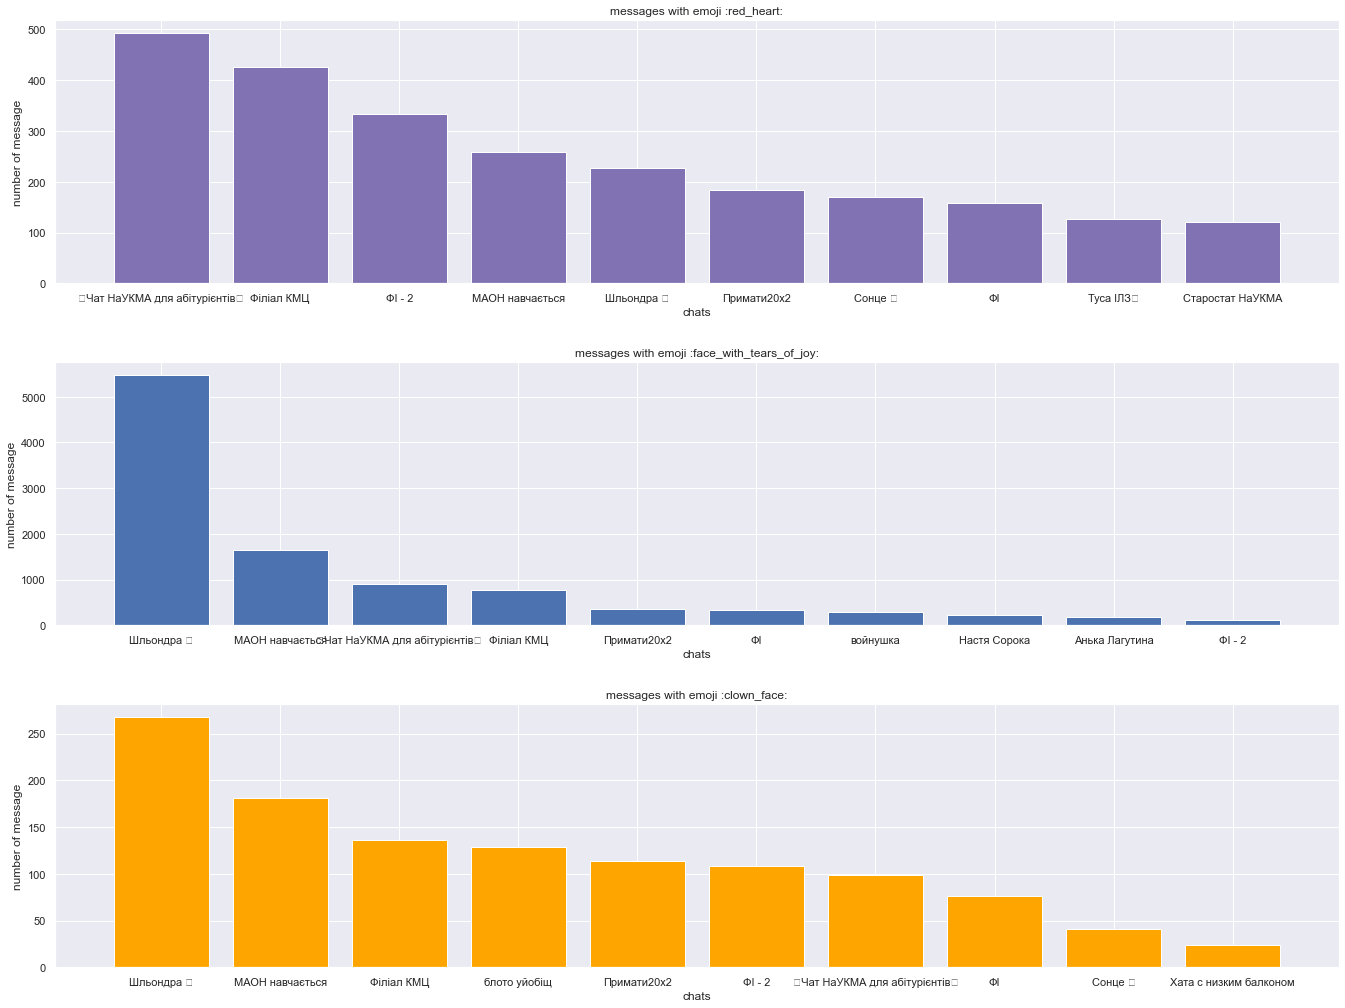

In [245]:
fig, ax = plt.subplots()
fig.set_size_inches(23,30)
emojis = [':red_heart:', ':face_with_tears_of_joy:', ':clown_face:']
colors = ['m', 'b', 'orange']

for number, em in enumerate(emojis):
    df_words = df_merged[(df_merged['message'].str.contains(emoji.emojize(em)) == True)]
    plt.subplot(5,1,number + 1)
    df_words = df_words.groupby('name', as_index=False)['message'].count()
    df_words = df_words.sort_values(by='message', ascending=False).head(10)
    x=df_words['name']
    y=df_words['message']
    plt.bar(x, y, color=colors[number])
    plt.title('messages with emoji ' + em)
    plt.ylabel(u'number of message')
    plt.xlabel(u'chats')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
sns.set(style="darkgrid")
plt.show()

4.2 Across sent message (top-5)

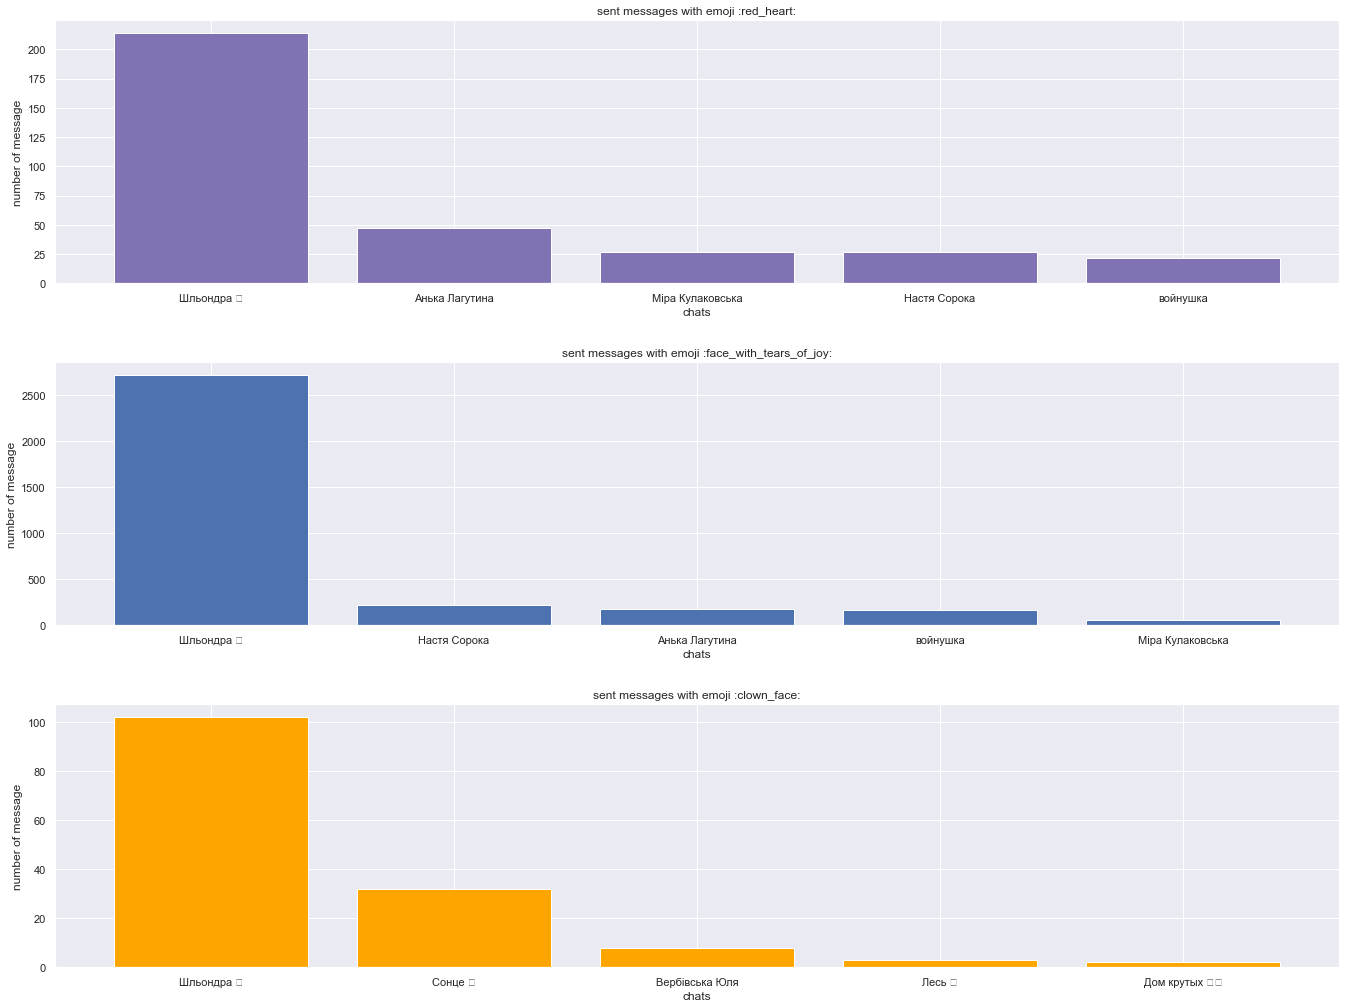

In [256]:
fig, ax = plt.subplots()
fig.set_size_inches(23,30)
emojis = [':red_heart:', ':face_with_tears_of_joy:', ':clown_face:']
colors = ['m', 'b', 'orange']

for number, em in enumerate(emojis):
    df_words = df_merged[(df_merged['message'].str.contains(emoji.emojize(em)) == True) & (df_merged['from_id']==my_id)]
    plt.subplot(5,1,number + 1)
    df_words = df_words.groupby('name', as_index=False)['message'].count()
    df_words = df_words.sort_values(by='message', ascending=False).head(5)
    x=df_words['name']
    y=df_words['message']
    plt.bar(x, y, color=colors[number])
    plt.title('sent messages with emoji ' + em)
    plt.ylabel(u'number of message')
    plt.xlabel(u'chats')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
sns.set(style="darkgrid")
plt.show()

4.3 Across received message (top-5)

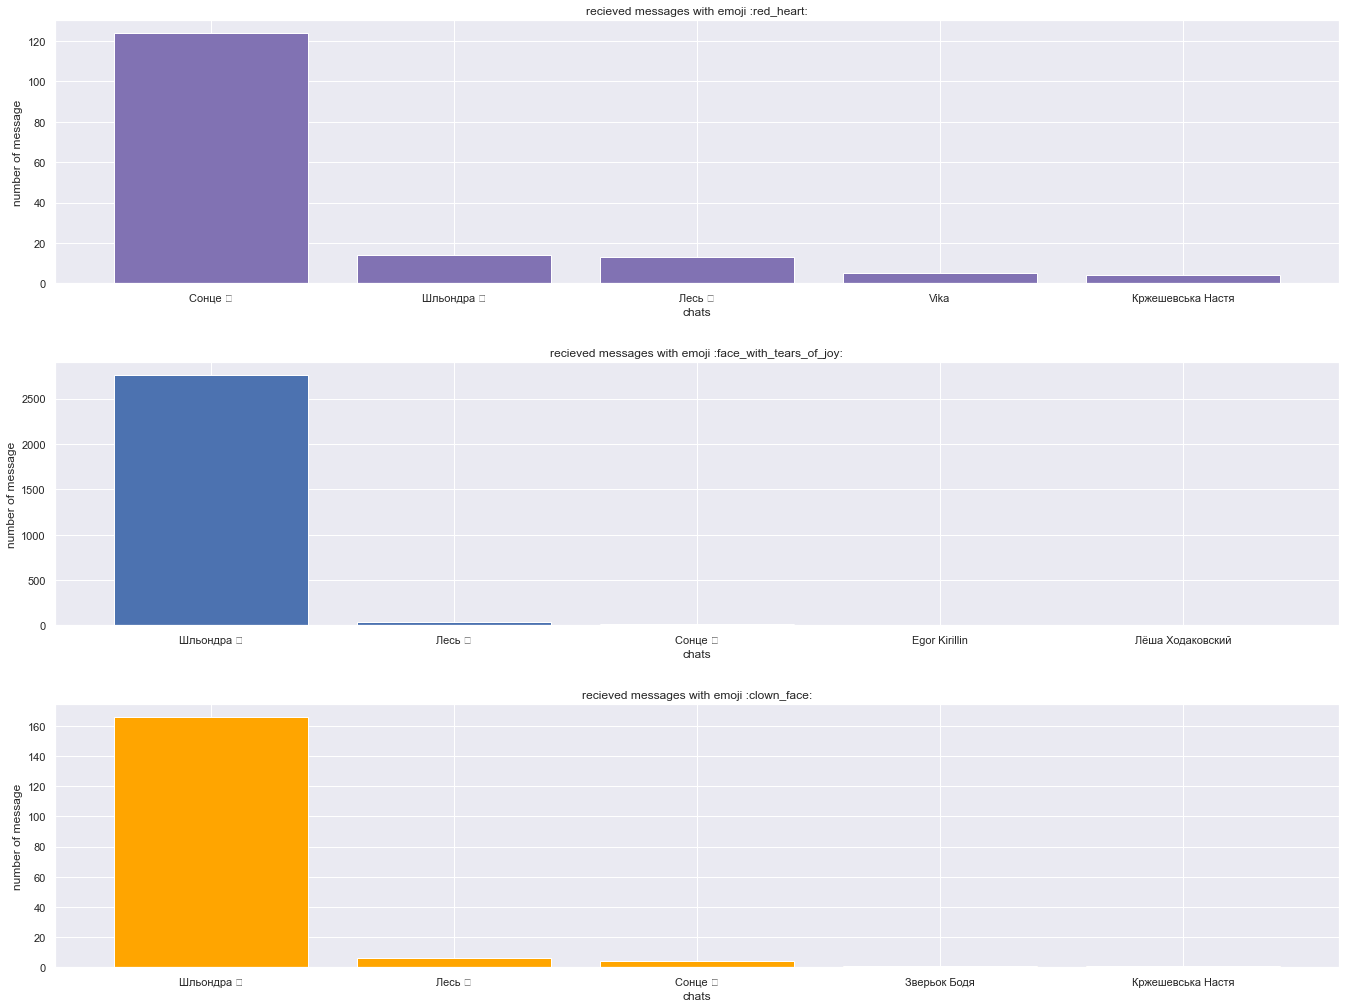

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(23,30)
emojis = [':red_heart:', ':face_with_tears_of_joy:', ':clown_face:']
colors = ['m', 'b', 'orange']

for number, em in enumerate(emojis):
    df_words = df_merged[(df_merged['message'].str.contains(emoji.emojize(em)) == True) & (df_merged['to_id']==my_id)]
    plt.subplot(5,1,number + 1)
    df_words = df_words.groupby('name', as_index=False)['message'].count()
    df_words = df_words.sort_values(by='message', ascending=False).head(5)
    x=df_words['name']
    y=df_words['message']
    plt.bar(x, y, color=colors[number])
    plt.title('recieved messages with emoji ' + em)
    plt.ylabel(u'number of message')
    plt.xlabel(u'chats')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.rcParams['font.size'] = '20'
    
sns.set(style="darkgrid")
plt.show()

# Analysis of one particular chat

In this part I will analyse the dialogue with my friend on many aspects. It will be based on a merged dataframe.

1. How often do you see her name variations and alias in chats by date

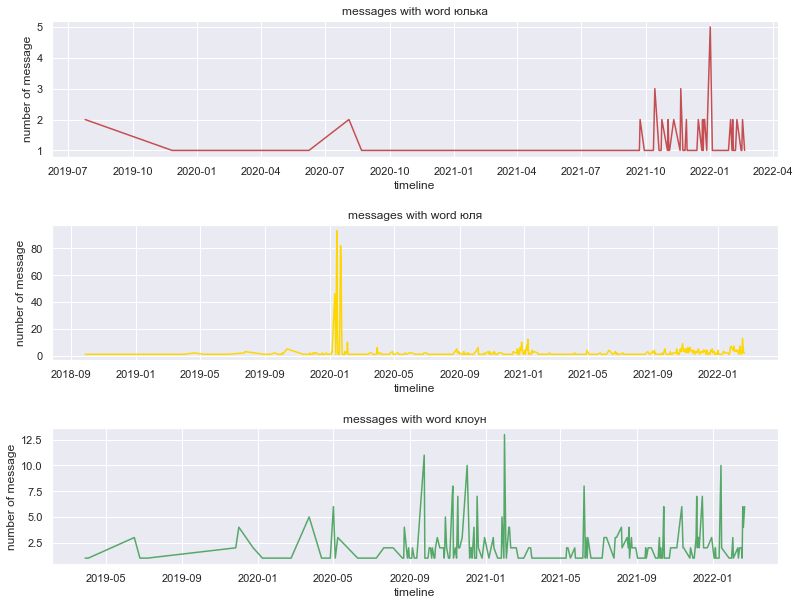

In [109]:
fig, ax = plt.subplots()
fig.set_size_inches(13,10)
words = ['юлька','юля','клоун']
colors = ['r', 'gold', 'g']

for number, word in enumerate(words):
    plt.subplot(3,1,number + 1)
    temp_df = df_merged[df_merged['message'].str.lower().str.contains(word) == True]
    temp_df = temp_df.groupby('date', as_index=False).count()
    x=temp_df['date']
    y=temp_df['message']
    plt.plot(x, y, color=colors[number])
    plt.title("messages with word " + word)
    plt.ylabel(u'number of message')
    plt.xlabel(u'timeline')
    plt.rcParams['font.size'] = '18'
    plt.subplots_adjust(wspace=0.5, hspace=0.5)


plt.show()

2. To find out how many texts I sent and received from a friend

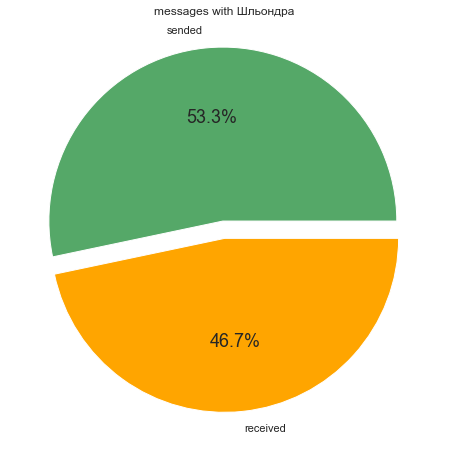

In [96]:
df_friend = df_merged[df_merged['name'].str.contains('Шльондра')==True]

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
explode = (0.1, 0)
colors3 = ['g', 'orange']

x1  = df_friend[df_friend['from_id'] == my_id].count()
x2  = df_friend[df_friend['to_id'] == my_id].count()
ax.set_title("messages with Шльондра")
values3 = [x1[0], x2[0]]
labes3 = ['sended', 'received']
plt.rcParams['font.size'] = '18'
ax.pie(values3, labels=labes3, autopct='%1.1f%%', colors = colors3,explode = explode)

    

plt.show()

3. Show the % of total messages by type and the number of texts I have sent and received from a friend on a pie chart

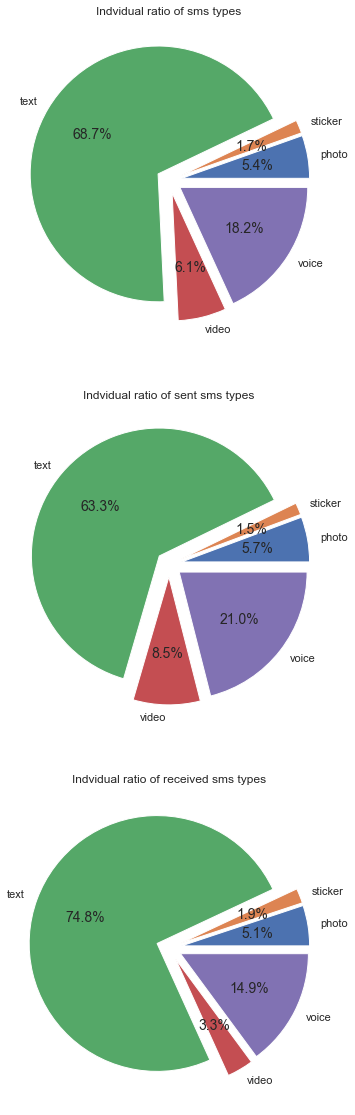

In [125]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_size_inches(10,20)
explode = (0.1, 0.1, 0.1,0.1,0.1)


send_message = df_friend[(df_friend['from_id'] == my_id)] 
received_message = df_friend[(df_friend['to_id'] == my_id)] 


x1 = df_friend.groupby('type_message')['type_message'].count()
x2 = list(df_friend.groupby('type_message')['type_message'].count().index)
ax1.set_title('Indvidual ratio of sms types')
ax1.pie(x1, labels=x2, autopct='%1.1f%%', explode = explode)
plt.rcParams['font.size'] = '14'


x3 = send_message.groupby('type_message')['type_message'].count()
x4 = list(send_message.groupby('type_message')['type_message'].count().index)
ax2.set_title('Indvidual ratio of sent sms types')
ax2.pie(x3, labels=x4, autopct='%1.1f%%', explode = explode)
plt.rcParams['font.size'] = '14'


x5 = received_message.groupby('type_message')['type_message'].count()
x6 = list(received_message.groupby('type_message')['type_message'].count().index)
ax3.set_title('Indvidual ratio of received sms types')
ax3.pie(x5, labels=x6, autopct='%1.1f%%', explode = explode)
plt.rcParams['font.size'] = '14'



plt.show()

4. Find out the number of text messages received from a friend and sent by certain categories of time

    4.1 SMS received and sent by days of week

    4.2 SMS received or sent by months

    4.3 SMS received and sent by hours

4.1 SMS received and sent by days of week

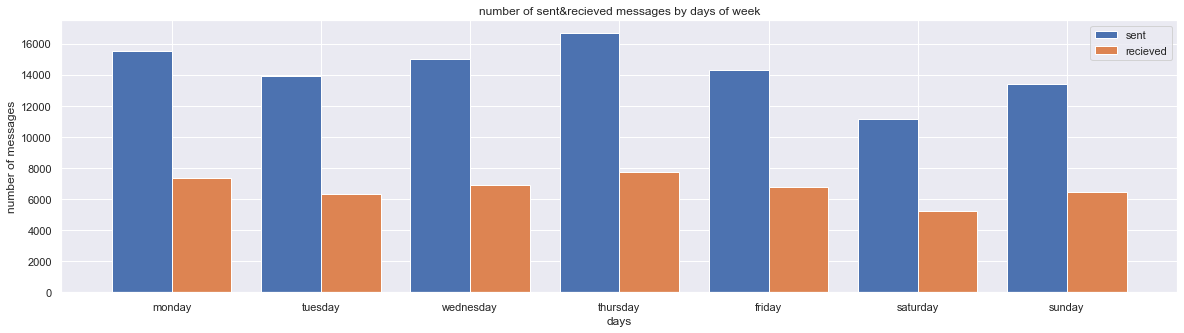

In [147]:
days = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']

new_df = df_friend[(df_friend['from_id'] == my_id)]
new_df['date'] = df_friend['date'].apply(lambda x: x.isoweekday())

vals = new_df.groupby('date')['date'].count()

fig, ax = plt.subplots()
fig.set_size_inches(20,5) 

days1=np.arange(len(days))


ax.set_title('number of sent&recieved messages by days of week')
ax.set_ylabel(u'number of messages')
ax.set_xlabel(u'days')
plt.rcParams['font.size'] = '16'


new_df = df_friend[(df_friend['to_id'] == my_id)]
new_df['date'] = df_friend['date'].apply(lambda x: x.isoweekday())

vals2 = new_df.groupby('date')['date'].count()

                
ax.bar(days1-0.2, vals,  width = 0.4, label ='sent')
ax.bar(days1+0.2, vals2,  width = 0.4, label='recieved')
plt.xticks(days1, days)
plt.legend()


plt.show()

4.2 SMS received or sent by months

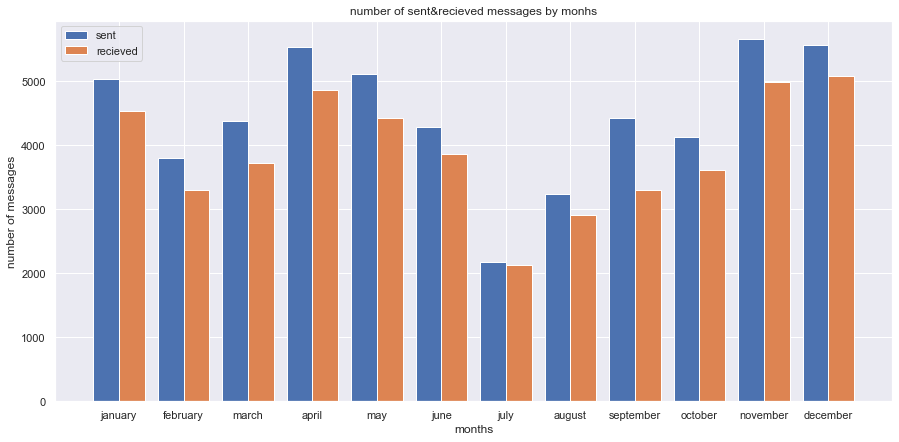

In [97]:
months = ['january','february','march','april','may','june','july','august','september','october','november','december']

new_df = df_friend[(df_friend['from_id'] == my_id)]
new_df['date'] = df_friend['date'].apply(lambda x: x.month)

vals = new_df.groupby('date')['date'].count()

fig, ax = plt.subplots()
fig.set_size_inches(15,7) 

months1=np.arange(len(months))

ax.bar(months1-0.2, vals, width = 0.4, label='sent')
ax.set_title('number of sent&recieved messages by monhs')
ax.set_ylabel(u'number of messages')
ax.set_xlabel(u'months')
plt.rcParams['font.size'] = '16'

new_df = df_friend[(df_friend['to_id'] == my_id)]
new_df['date'] = df_friend['date'].apply(lambda x: x.month)
new_df.head(20)

vals2 = new_df.groupby('date')['date'].count()


ax.bar(months1+0.2, vals2, width = 0.4, label='recieved')
plt.xticks(months1, months)
plt.legend()


plt.show()

4.3 SMS received and sent by hours

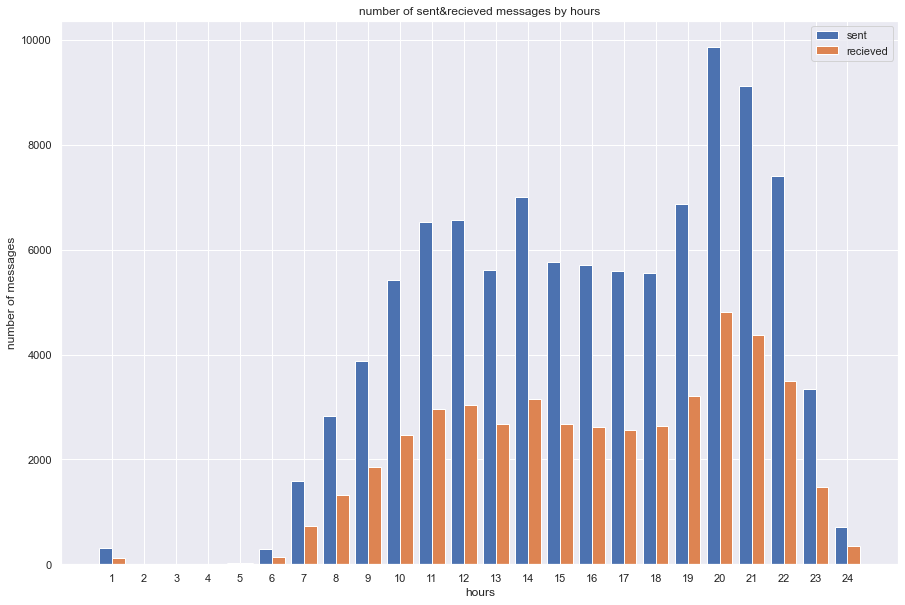

In [212]:
df_new_date = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_new_date['date'] = pd.to_datetime(df_new_date['date'])
help_merge = df_meta.copy().drop_duplicates(subset = 'dialog_id', keep = 'first').drop('users', axis = 1)
df_merged = pd.merge(df_new_date, help_merge, on = "dialog_id")
df_merged.rename(columns = {'type_x':'type_message', 'type_y':'type_dialog'}, inplace = True)

df_friend = df_merged[df_merged['name'].str.contains('Шльондра')==True]

hours = [str(i) for i in range(1,25)]

new_df = df_friend[(df_friend['from_id'] == my_id)]
new_df['date'] = df_friend['date'].apply(lambda x: x.hour)

vals = new_df.groupby('date')['date'].count()

hours1=np.arange(len(hours))

fig, ax = plt.subplots()
fig.set_size_inches(15,10) 

ax.bar(hours1-0.2, vals,width = 0.4,label='sent')
ax.set_title('number of sent&recieved messages by hours')
ax.set_ylabel(u'number of messages')
ax.set_xlabel(u'hours')
plt.rcParams['font.size'] = '16'

new_df = df_friend[(df_friend['to_id'] == my_id)]
new_df['date'] = df_friend['date'].apply(lambda x: x.hour)

vals_2 = new_df.groupby('date')['date'].count()


ax.bar(hours1+0.2, vals_2,width = 0.4,label='recieved')
plt.xticks(hours1, hours)
plt.legend()


plt.show()

5. Investigate which words I receive from friend and send most often. Visualise the results

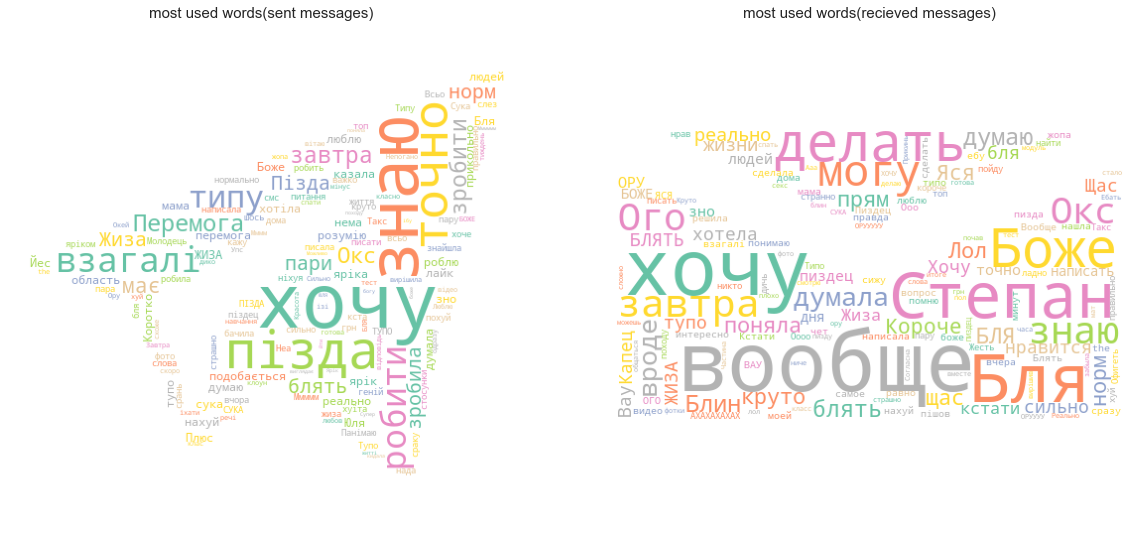

In [201]:
df_friend['from_id'] = df_friend['from_id'].apply(lambda x: np.int64(x.strip().split('=')[-1].replace(")", "")) if type(x) != float else x)

def readFile(fileName):
    with open(fileName, 'r') as f:
        words = f.read().splitlines()
    return words

words = []
stopwords_ru = get_stop_words('russian')
stopwords_ua = readFile('C:/Users/Kuziomko/Desktop/Книга1.txt')

def get_words(df_friend):
    words = []
    for ind in df_friend['message'].index:
        for word in str(df_friend['message'][ind]).split():
            word.replace(".","")
            if (word.lower() not in stopwords_ua) and (word.lower() not in stopwords_ru) and (word.lower() != 'nan') and (word.isalpha()) and (len(word)>2):
                words.append(word)
    return words



fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(20,10)

sent_df = df_friend[df_friend['from_id'] == my_id]
c_sent = get_words(sent_df)
wordcount = pd.value_counts(np.array(c_sent))
wordcloud = WordCloud(colormap='Set2', 
                          collocations=False, 
                          background_color="white", 
                          width=2500, 
                          height=2500, 
                          max_words=150,
                          mask=mask2).generate_from_frequencies(wordcount)
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('most used words(sent messages)', fontsize = 15)

received_df = df_friend[df_friend['to_id'] == my_id]
c_received = get_words(received_df)
wordcount = pd.value_counts(np.array(c_received))
wordcloud = WordCloud(colormap='Set2', 
                          collocations=False, 
                          background_color="white", 
                          width=2500, 
                          height=2500, 
                          max_words=150,
                          mask=mask1).generate_from_frequencies(wordcount)
ax2.imshow(wordcloud)
ax2.axis('off')
ax2.set_title('most used words(recieved messages)', fontsize = 15)

plt.show()

6. Compare the number of times I have received from friend and sent the word and show the result on the diagram

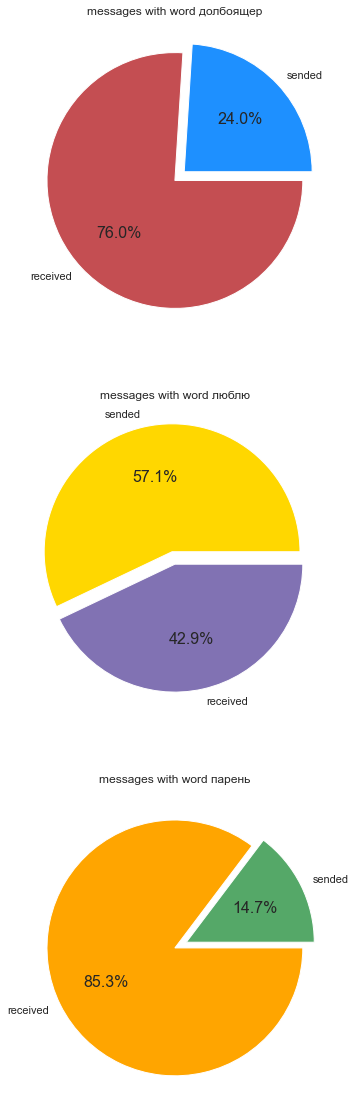

In [160]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_size_inches(10,20)
words = ['долбоящер','люблю','парень']
explode = (0.1, 0)
colors1 = ['dodgerblue','r']
colors2 = ['gold', 'm']
colors3 = ['g', 'orange']

x1  = df_friend[(df_friend['message'].str.lower().str.contains(words[0]) == True) & (df_friend['from_id'] == my_id)].count()
x2  = df_friend[(df_friend['message'].str.lower().str.contains(words[0]) == True) & (df_friend['to_id'] == my_id)].count()
ax1.set_title("messages with word " + words[0])
values1 = [x1[0], x2[0]]
labes1 = ['sended', 'received']
ax1.pie(values1, labels=labes1, autopct='%1.1f%%', colors = colors1, explode = explode)


x3  = df_friend[(df_friend['message'].str.lower().str.contains(words[1]) == True) & (df_friend['from_id'] == my_id)].count()
x4  = df_friend[(df_friend['message'].str.lower().str.contains(words[1]) == True) & (df_friend['to_id'] == my_id)].count()
ax2.set_title("messages with word " + words[1])
values2 = [x3[0], x4[0]]
labes2 = ['sended', 'received']
ax2.pie(values2, labels=labes2, autopct='%1.1f%%', colors = colors2,explode = explode)


x4  = df_friend[(df_friend['message'].str.lower().str.contains(words[2]) == True) & (df_friend['from_id'] == my_id)].count()
x5  = df_friend[(df_friend['message'].str.lower().str.contains(words[2]) == True) & (df_friend['to_id'] == my_id)].count()
ax3.set_title("messages with word " + words[2])
values3 = [x4[0], x5[0]]
labes3 = ['sended', 'received']
ax3.pie(values3, labels=labes3, autopct='%1.1f%%', colors = colors3,explode = explode)

    

plt.show()